<a href="https://colab.research.google.com/github/mwangcy/BA820/blob/main/Project_BA820/Project_BA820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BA820 Project Sentiment analysis


# EDA and Cleaning

We import the necessary packages for the data cleaning.

In [1]:
!pip install opendatasets
!pip install nltk

In [2]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import opendatasets as od
import pandas as pd
import numpy as np

od.download(
    "https://www.kaggle.com/datasets/hadasu92/cnn-articles-after-basic-cleaning")

Skipping, found downloaded files in "./cnn-articles-after-basic-cleaning" (use force=True to force download)


In [4]:
import pandas as pd

df = pd.read_csv("/content/cnn-articles-after-basic-cleaning/CNN_Articels_clean_2/CNN_Articels_clean.csv")
df.head()

Index                                             Author  \
0      0                                 Jacopo Prisco, CNN   
1      1                              Stephanie Bailey, CNN   
2      2  Words by Stephanie Bailey, video by Zahra Jamshed   
3      3                                     Kathryn Vasel    
4      4                    Paul R. La Monica, CNN Business   

        Date published  Category    Section  \
0  2021-07-15 02:46:59      news      world   
1  2021-05-12 07:52:09      news      world   
2  2021-06-16 02:51:30      news       asia   
3  2022-03-18 14:37:21  business    success   
4  2022-03-19 11:41:08  business  investing   

                                                 Url  \
0  https://www.cnn.com/2021/07/14/world/tusimple-...   
1  https://www.cnn.com/2021/05/12/world/ironhand-...   
2  https://www.cnn.com/2021/06/15/asia/swarm-robo...   
3  https://www.cnn.com/2022/03/18/success/pandemi...   
4  https://www.cnn.com/2022/03/19/investing/march...   

                                            Headline  \
0  There's a shortage of truckers, but TuSimple t...   
1  Bioservo's robotic 'Ironhand' could protect fa...   
2  This swarm of robots gets smarter the more it ...   
3  Two years later, remote work has changed milli...   
4          Why March is so volatile for stocks - CNN   

                                         Description  \
0  The e-commerce boom has exacerbated a global t...   
1  Working in a factory can mean doing the same t...   
2  In a Hong Kong warehouse, a swarm of autonomou...   
3  Here's a look at how the pandemic reshaped peo...   
4  March Madness isn't just for college basketbal...   

                                            Keywords  \
0  world, There's a shortage of truckers, but TuS...   
1  world, Bioservo's robotic 'Ironhand' could pro...   
2  asia, This swarm of robots gets smarter the mo...   
3  success, Two years later, remote work has chan...   
4  investing, Why March is so volatile for stocks...   

                                     Second headline  \
0  There's a shortage of truckers, but TuSimple t...   
1  A robotic 'Ironhand' could protect factory wor...   
2  This swarm of robots gets smarter the more it ...   
3  Two years later, remote work has changed milli...   
4                Why March is so volatile for stocks   

                                        Article text  
0   (CNN)Right now, there's a shortage of truck d...  
1   (CNN)Working in a factory or warehouse can me...  
2   (CNN)In a Hong Kong warehouse, a swarm of aut...  
3  The pandemic thrust the working world into a n...  
4  New York (CNN Business)March Madness isn't jus...

We drop the column that will not be used for the data modeling.


In [5]:
df.drop(["Index", "Url"], axis = 1, inplace = True)

We find the rows with missing values.

In [6]:
df[df.isna().any(axis=1)].head(10)

Author       Date published  \
11591                                                By   2012-01-17 11:27:16   
18989                                 Monica Sarkar, CNN  2015-05-05 11:44:49   
19171                                 Nic Robertson, CNN  2015-06-05 16:39:28   
24462              James Masters and Tamara Qiblawi, CNN  2017-08-17 15:46:53   
24583      Lauren Said-Moorhouse and Judith Vonberg, CNN  2017-09-24 16:27:35   
24621            Nick Thompson and Eliza Mackintosh, CNN  2017-09-15 09:41:41   
24791             Eliza Mackintosh and Bryony Jones, CNN  2017-10-10 15:47:29   
25430         Matias Grez and Lauren Said-Moorhouse, CNN  2018-02-09 10:01:08   
25594  Blathnaid Healy, James Masters and Eliza Macki...  2018-03-18 17:14:22   

      Category Section                                           Headline  \
11591     news  europe  Underwater scenes of the Costa Concordia wreck...   
18989     news  europe  Outsiders welcome? UK migrants share their sto...   
19171     news  europe                       Sarajevo: Then and Now - CNN   
24462     news  europe        Terror attacks in Spain: Live updates - CNN   
24583     news  europe           Germany results 2017: Live updates - CNN   
24621     news  europe  London Underground train blast: Live updates -...   
24791     news  europe    Catalan independence speech: Live updates - CNN   
25430    sport   sport      Olympics opening ceremony: Live updates - CNN   
25594     news  europe          Live updates: Russian election 2018 - CNN   

                                             Description  \
11591  The Italian Coast Guard has released photos of...   
18989  Immigration has been one of the most hotly-con...   
19171  During the Bosnian War, CNN's Nic Robertson do...   
24462  A van plowed into a crowd of people in the pop...   
24583  Exit polls in Germany suggest voters have give...   
24621  An improvised explosive device was detonated o...   
24791  Catalonia's President, Carles Puigdemont, has ...   
25430  The 2018 Winter Olympics open in PyeongChang, ...   
25594  Russia's presidential election is widely expec...   

                                                Keywords  \
11591  europe, Underwater scenes of the Costa Concord...   
18989  europe, Outsiders welcome? UK migrants share t...   
19171               europe, Sarajevo: Then and Now - CNN   
24462  europe, Terror attacks in Spain: Live updates ...   
24583   europe, Germany results 2017: Live updates - CNN   
24621  europe, London Underground train blast: Live u...   
24791  europe, Catalan independence speech: Live upda...   
25430  sport, Olympics opening ceremony: Live updates...   
25594  europe, Live updates: Russian election 2018 - CNN   

                                         Second headline Article text  
11591  Underwater scenes of the Costa Concordia wreckage          NaN  
18989  Outsiders welcome? UK migrants share their sto...          NaN  
19171                             Sarajevo: Then and Now          NaN  
24462              Terror attacks in Spain: Live updates          NaN  
24583                 Germany results 2017: Live updates          NaN  
24621       London Underground train blast: Live updates          NaN  
24791          Catalan independence speech: Live updates          NaN  
25430            Olympics opening ceremony: Live updates          NaN  
25594                Live updates: Russian election 2018          NaN

We clean the Author column since it contains errors and typos.





In [7]:
df[df["Author"].str.match("By $")].head()

Author       Date published Category     Section  \
3096     By   2012-08-09 16:20:03     news       world   
4001     By   2012-11-15 07:40:14     news        asia   
4211     By   2014-02-22 21:18:46     news  worldsport   
5098     By   2012-01-05 20:44:31     news      living   
10470    By   2011-08-24 17:54:07    sport  motorsport   

                                                Headline  \
3096                           Sponsorships policy - CNN   
4001             Xi Jinping's first public address - CNN   
4211   Sochi 2014: More woes for U.S. hockey but joy ...   
5098                    How to nominate a CNN Hero - CNN   
10470         Senna to replace Heidfeld in Belgium - CNN   

                                             Description  \
3096   Parts of CNN's coverage beyond the daily news ...   
4001   Ladies, gentlemen and friends, hello. (We) hav...   
4211   It's been a tough last few days for U.S. hocke...   
5098   They're your neighbors, your friends, your col...   
10470  Brazilian driver Bruno Senna will replace Nick...   

                                                Keywords  \
3096                    world, Sponsorships policy - CNN   
4001       asia, Xi Jinping's first public address - CNN   
4211   worldsport, Sochi 2014: More woes for U.S. hoc...   
5098            living, How to nominate a CNN Hero - CNN   
10470  motorsport, Senna to replace Heidfeld in Belgi...   

                                         Second headline  \
3096                                 Sponsorships policy   
4001                   Xi Jinping's first public address   
4211   Sochi 2014: More woes for U.S. hockey but joy ...   
5098                          How to nominate a CNN Hero   
10470               Senna to replace Heidfeld in Belgium   

                                            Article text  
3096   Parts of CNN's coverage beyond the daily news ...  
4001   Story highlightsChinese Communist Party faces ...  
4211   Story highlightsThe U.S. loses to Finland 5-0 ...  
5098   Story highlightsMost CNN Heroes are selected a...  
10470  Story highlightsBruno Senna will replace Nick ...

In [8]:
mapping = {"By $" : "Anonymous"}
df["Author"] = df["Author"].replace(mapping, regex=True)

In [9]:
df[df["Author"].str.match("Anonymous")].head()

Author       Date published Category     Section  \
3096   Anonymous  2012-08-09 16:20:03     news       world   
4001   Anonymous  2012-11-15 07:40:14     news        asia   
4211   Anonymous  2014-02-22 21:18:46     news  worldsport   
5098   Anonymous  2012-01-05 20:44:31     news      living   
10470  Anonymous  2011-08-24 17:54:07    sport  motorsport   

                                                Headline  \
3096                           Sponsorships policy - CNN   
4001             Xi Jinping's first public address - CNN   
4211   Sochi 2014: More woes for U.S. hockey but joy ...   
5098                    How to nominate a CNN Hero - CNN   
10470         Senna to replace Heidfeld in Belgium - CNN   

                                             Description  \
3096   Parts of CNN's coverage beyond the daily news ...   
4001   Ladies, gentlemen and friends, hello. (We) hav...   
4211   It's been a tough last few days for U.S. hocke...   
5098   They're your neighbors, your friends, your col...   
10470  Brazilian driver Bruno Senna will replace Nick...   

                                                Keywords  \
3096                    world, Sponsorships policy - CNN   
4001       asia, Xi Jinping's first public address - CNN   
4211   worldsport, Sochi 2014: More woes for U.S. hoc...   
5098            living, How to nominate a CNN Hero - CNN   
10470  motorsport, Senna to replace Heidfeld in Belgi...   

                                         Second headline  \
3096                                 Sponsorships policy   
4001                   Xi Jinping's first public address   
4211   Sochi 2014: More woes for U.S. hockey but joy ...   
5098                          How to nominate a CNN Hero   
10470               Senna to replace Heidfeld in Belgium   

                                            Article text  
3096   Parts of CNN's coverage beyond the daily news ...  
4001   Story highlightsChinese Communist Party faces ...  
4211   Story highlightsThe U.S. loses to Finland 5-0 ...  
5098   Story highlightsMost CNN Heroes are selected a...  
10470  Story highlightsBruno Senna will replace Nick ...

In [10]:
df.head()

Author       Date published  \
0                                 Jacopo Prisco, CNN  2021-07-15 02:46:59   
1                              Stephanie Bailey, CNN  2021-05-12 07:52:09   
2  Words by Stephanie Bailey, video by Zahra Jamshed  2021-06-16 02:51:30   
3                                     Kathryn Vasel   2022-03-18 14:37:21   
4                    Paul R. La Monica, CNN Business  2022-03-19 11:41:08   

   Category    Section                                           Headline  \
0      news      world  There's a shortage of truckers, but TuSimple t...   
1      news      world  Bioservo's robotic 'Ironhand' could protect fa...   
2      news       asia  This swarm of robots gets smarter the more it ...   
3  business    success  Two years later, remote work has changed milli...   
4  business  investing          Why March is so volatile for stocks - CNN   

                                         Description  \
0  The e-commerce boom has exacerbated a global t...   
1  Working in a factory can mean doing the same t...   
2  In a Hong Kong warehouse, a swarm of autonomou...   
3  Here's a look at how the pandemic reshaped peo...   
4  March Madness isn't just for college basketbal...   

                                            Keywords  \
0  world, There's a shortage of truckers, but TuS...   
1  world, Bioservo's robotic 'Ironhand' could pro...   
2  asia, This swarm of robots gets smarter the mo...   
3  success, Two years later, remote work has chan...   
4  investing, Why March is so volatile for stocks...   

                                     Second headline  \
0  There's a shortage of truckers, but TuSimple t...   
1  A robotic 'Ironhand' could protect factory wor...   
2  This swarm of robots gets smarter the more it ...   
3  Two years later, remote work has changed milli...   
4                Why March is so volatile for stocks   

                                        Article text  
0   (CNN)Right now, there's a shortage of truck d...  
1   (CNN)Working in a factory or warehouse can me...  
2   (CNN)In a Hong Kong warehouse, a swarm of aut...  
3  The pandemic thrust the working world into a n...  
4  New York (CNN Business)March Madness isn't jus...

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37949 entries, 0 to 37948
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Author           37949 non-null  object
 1   Date published   37949 non-null  object
 2   Category         37949 non-null  object
 3   Section          37949 non-null  object
 4   Headline         37949 non-null  object
 5   Description      37949 non-null  object
 6   Keywords         37949 non-null  object
 7   Second headline  37949 non-null  object
 8   Article text     37940 non-null  object
dtypes: object(9)
memory usage: 2.6+ MB


In [12]:
df.describe()

Author       Date published Category Section  \
count       37949                37949    37949   37949   
unique      11744                37948        9      55   
top     Anonymous  2016-02-17 14:08:53     news  europe   
freq         3286                    2    18077   10635   

                                   Headline Description  \
count                                 37949       37949   
unique                                37857       37829   
top     Must-watch videos of the week - CNN               
freq                                     14          22   

                                                 Keywords  \
count                                               37949   
unique                                              37863   
top     app-news-section, Must-watch videos of the wee...   
freq                                                   14   

                      Second headline Article text  
count                           37949        37940  
unique                          37881        37918  
top     Must-watch videos of the week           \n  
freq                               14           14

In [13]:
df.Author.value_counts().head()

Anonymous                3286
Matias Grez, CNN          686
Ben Morse, CNN            584
By the CNN Wire Staff     575
George Ramsay, CNN        562
Name: Author, dtype: int64

In [14]:
df[df["Author"] == " "].head()

Author       Date published Category     Section  \
17190         2014-04-18 14:10:18    sport  motorsport   
17461         2014-06-20 13:28:13    sport        golf   
17961         2014-10-11 19:17:09    sport      tennis   
17998         2014-11-29 19:54:39    sport    football   
17999         2014-11-29 22:10:33    sport    football   

                                                Headline  \
17190    Ferrari back on form in Shanghai practice - CNN   
17461  U.S. Women's Open: 11-year-old Lucy Li misses ...   
17961  Federer beats Djokovic to reach Shanghai final...   
17998  Football: Chelsea draw blank for first time in...   
17999  Unstoppable Real Madrid register record winnin...   

                                             Description  \
17190  It's been another difficult start to the seaso...   
17461  She's got nerves of steel, golf talent beyond ...   
17961  Roger Federer produced an imperious performanc...   
17998  Chelsea maintained its unbeaten start to the E...   
17999  Karim Benzema and Gareth Bale strike for Real ...   

                                                Keywords  \
17190  chinese grand prix, grand prix china, ferrari,...   
17461  lucy li, youngest us open, us womens open, Sta...   
17961  federer shanghai, federer djokovic, shanghai m...   
17998  football, Football: Chelsea draw blank for fir...   
17999  football, Unstoppable Real Madrid register rec...   

                                         Second headline  \
17190          Ferrari back on form in Shanghai practice   
17461  U.S. Women's Open: 11-year-old Lucy Li misses cut   
17961  Roger Federer eases Novak Djokovic aside to re...   
17998  Football: High-flying Chelsea held by Sunderla...   
17999  Unstoppable Real Madrid register club-record 1...   

                                            Article text  
17190  Story highlightsFernando Alonso posts second f...  
17461  Story highlightsLucy Li, 11, becomes the young...  
17961  Story highlightsRoger Federer defeats Novak Dj...  
17998  Story highlightsChelsea held away to Sunderlan...  
17999  Story highlightsReal Madrid set new club recor...

In [15]:
mapping_2 = {r"^\s*$": "Anonymous"}
df["Author"] = df["Author"].replace(mapping_2, regex=True)

In [16]:
df.Author.sort_values().head()

19287                         Amanda Davies and Chris Borg
32921     Angela Dewan, Luke McGee and Richard Allen Gr...
23118       Basma Atassi, Greg Botelho and Gul Tuysuz, CNN
22404               By Amanda Davies and Rob Hodgetts, CNN
33890                                   By Luke McGee, CNN
Name: Author, dtype: object

In [17]:
df.isna().sum()

Author             0
Date published     0
Category           0
Section            0
Headline           0
Description        0
Keywords           0
Second headline    0
Article text       9
dtype: int64

We drop the rows with missing values from the dataset.






In [18]:
df.dropna(inplace = True)

In [19]:
df

Author       Date published  \
0                                     Jacopo Prisco, CNN  2021-07-15 02:46:59   
1                                  Stephanie Bailey, CNN  2021-05-12 07:52:09   
2      Words by Stephanie Bailey, video by Zahra Jamshed  2021-06-16 02:51:30   
3                                         Kathryn Vasel   2022-03-18 14:37:21   
4                        Paul R. La Monica, CNN Business  2022-03-19 11:41:08   
...                                                  ...                  ...   
37944                   Ben Church and Aleks Klosok, CNN  2022-03-01 10:59:10   
37945                               Tamara Qiblawi, CNN   2022-03-01 12:55:37   
37946               Wayne Sterling and Steve Almasy, CNN  2022-03-01 11:54:44   
37947                             CNN Editorial Research  2013-01-12 01:42:49   
37948                             CNN Editorial Research  2013-06-27 18:31:28   

       Category    Section                                           Headline  \
0          news      world  There's a shortage of truckers, but TuSimple t...   
1          news      world  Bioservo's robotic 'Ironhand' could protect fa...   
2          news       asia  This swarm of robots gets smarter the more it ...   
3      business    success  Two years later, remote work has changed milli...   
4      business  investing          Why March is so volatile for stocks - CNN   
...         ...        ...                                                ...   
37944     sport      sport  Russian President Vladimir Putin is being stri...   
37945      news     europe  On NATO's doorstep, a former tourist hotspot i...   
37946     sport      sport  MLB is postponing Opening Day after owners and...   
37947      news     europe                 Mikhail Gorbachev Fast Facts - CNN   
37948      news     europe                   Duchess Camilla Fast Facts - CNN   

                                             Description  \
0      The e-commerce boom has exacerbated a global t...   
1      Working in a factory can mean doing the same t...   
2      In a Hong Kong warehouse, a swarm of autonomou...   
3      Here's a look at how the pandemic reshaped peo...   
4      March Madness isn't just for college basketbal...   
...                                                  ...   
37944  Russian President Vladimir Putin has been stri...   
37945  A long line of men snakes out of an unassuming...   
37946  Major League Baseball (MLB) is postponing its ...   
37947  Read CNN's Fast Facts on Mikhail Gorbachev, fo...   
37948  Read CNN's Fast Facts on Duchess Camilla, the ...   

                                                Keywords  \
0      world, There's a shortage of truckers, but TuS...   
1      world, Bioservo's robotic 'Ironhand' could pro...   
2      asia, This swarm of robots gets smarter the mo...   
3      success, Two years later, remote work has chan...   
4      investing, Why March is so volatile for stocks...   
...                                                  ...   
37944  sport, Russian President Vladimir Putin is bei...   
37945  europe, On NATO's doorstep, a former tourist h...   
37946  sport, MLB is postponing Opening Day after own...   
37947         europe, Mikhail Gorbachev Fast Facts - CNN   
37948           europe, Duchess Camilla Fast Facts - CNN   

                                         Second headline  \
0      There's a shortage of truckers, but TuSimple t...   
1      A robotic 'Ironhand' could protect factory wor...   
2      This swarm of robots gets smarter the more it ...   
3      Two years later, remote work has changed milli...   
4                    Why March is so volatile for stocks   
...                                                  ...   
37944  Vladimir Putin is being stripped of his honora...   
37945  On NATO's doorstep, a former tourist hotspot i...   
37946  MLB is postponing Opening Day after owners and...   
37947                       Mikhail Gorbachev Fast Facts   
37

In [20]:
df.Category.value_counts()

news             18069
sport            15541
politics          2461
business           854
health             557
entertainment      413
travel              39
vr                   5
style                1
Name: Category, dtype: int64

In [21]:
df.Section.value_counts().head()

europe      10627
sport        5638
football     4911
politics     2461
us           2119
Name: Section, dtype: int64

## Sampling

Since the text article contains a lot of words, in order to make it run faster, we will only sample a fraction of the data for now.

In [22]:
df = df.sample(frac=0.20, random_state = 327)

## Pre-Processing

We lowercase all the strings and remove all leading and trailing spaces.






In [23]:
columns = list(df.columns)
columns = [column for column in columns if column not in ["Author", "Date published"]]
columns

for column in columns:
  df[column] = df[column].str.lower()
  df[column] = df[column].str.strip()
  df[column] = df[column].str.replace("()-.:", " ")
  df[column] = df[column].str.replace("\\", "")
  df[column] = df[column].str.replace("?", "? ")
  df[column] = df[column].str.replace("!", "! ")
  df[column] = df[column].str.replace(r"\b\d{2}:\d{2}", "", regex=True)

df.head()

<ipython-input-23-9a5acf64e955>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace("()-.:", " ")
<ipython-input-23-9a5acf64e955>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace("\\", "")
<ipython-input-23-9a5acf64e955>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[column] = df[column].str.replace("?", "? ")


Author       Date published  \
8850                   John Newsome and Ralph Ellis, CNN  2016-12-27 02:13:07   
4731                              Laura Smith-Spark, CNN  2018-01-05 12:49:23   
25132                Dakin Andone and Vasco Cotovio, CNN  2017-12-01 21:46:43   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...  2015-02-27 22:18:54   
13314                                          Anonymous  2012-07-03 17:15:24   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters' ri...   
25132     news      europe  prosecutor: bosnian croat war criminal had cya...   
18330     news      europe   boris nemtsov, critic of putin, shot dead  - cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us, former texas rangers pitcher john barfield...   
4731   middleeast, un experts urge iran to respect pr...   
25132  europe, prosecutor: bosnian croat war criminal...   
18330  europe, boris nemtsov, critic of putin, shot d...   
13314  tennis, murray ends marathon match to seal wim...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor: bosnian croat war criminal died of...   
18330  boris nemtsov, outspoken putin critic, shot de...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  
8850   story highlightsthe domestic incident occurred...  
4731   (cnn)un human rights experts urged iranian aut...  
25132  story highlightsslobodan praljak, a former cro...  
18330  story highlights a mourning march will be held...  
13314  story highlightsbritain's andy murray books wi...

We change the "Data published" column to a datetime datatype.






In [24]:
df["Date published"] = pd.to_datetime(df["Date published"]).dt.strftime('%Y/%m')
df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters' ri...   
25132     news      europe  prosecutor: bosnian croat war criminal had cya...   
18330     news      europe   boris nemtsov, critic of putin, shot dead  - cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us, former texas rangers pitcher john barfield...   
4731   middleeast, un experts urge iran to respect pr...   
25132  europe, prosecutor: bosnian croat war criminal...   
18330  europe, boris nemtsov, critic of putin, shot d...   
13314  tennis, murray ends marathon match to seal wim...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor: bosnian croat war criminal died of...   
18330  boris nemtsov, outspoken putin critic, shot de...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  
8850   story highlightsthe domestic incident occurred...  
4731   (cnn)un human rights experts urged iranian aut...  
25132  story highlightsslobodan praljak, a former cro...  
18330  story highlights a mourning march will be held...  
13314  story highlightsbritain's andy murray books wi...

We clean the strings by removing the punctuation, except "!" and "?", since they would be relevant for sentiment analysis. We also remove all double spaces caused by the data cleaning.

In [25]:
import re

for column in columns:
  df[column] = df[column].apply(lambda x: re.sub(r"[^\w\s!?]", "", x))
  df[column] = df[column].apply(lambda x: re.sub(r"\d", "", x))
  df[column] = df[column].apply(lambda x: re.sub(r"\s+", " ", x))

df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  
8850   story highlightsthe domestic incident occurred...  
4731   cnnun human rights experts urged iranian autho...  
25132  story highlightsslobodan praljak a former croa...  
18330  story highlights a mourning march will be held...  
13314  story highlightsbritains andy murray books wim...

We create a new function for tokenization for the BoW and TF-IDF. By using stemming, we can reduce the number of columns and make the comparison between sentences easier.

In [26]:
### Stemming Code
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

english_stop_words = set(stopwords.words("english"))
Stemmer = PorterStemmer()

def stemming_processing(x):
    words = word_tokenize(x)
    stem_words = [Stemmer.stem(word) for word in words if word not in english_stop_words]
    return stem_words

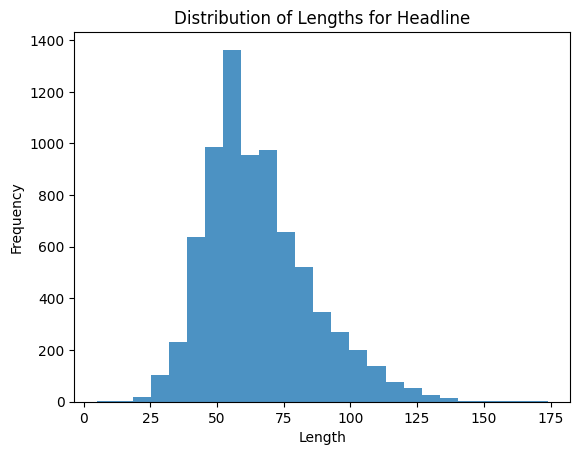

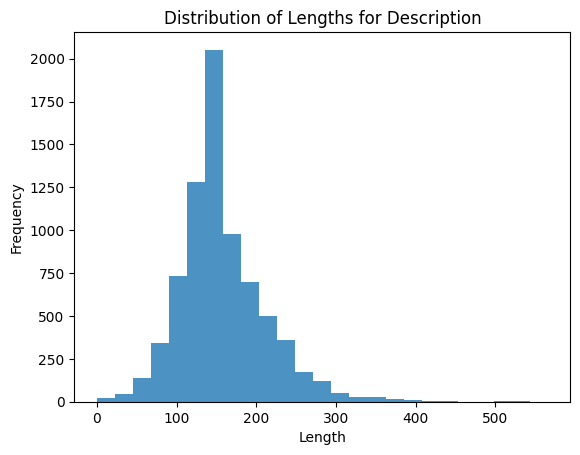

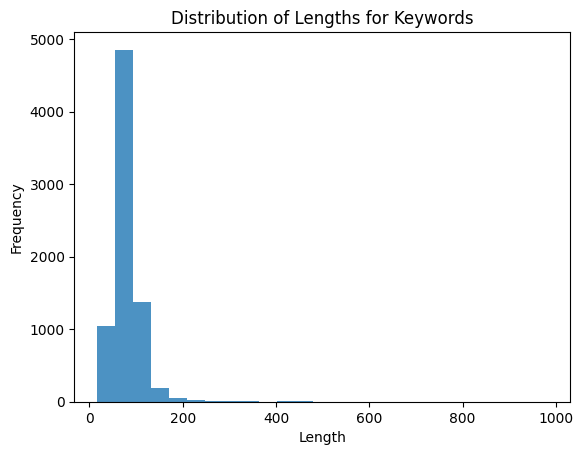

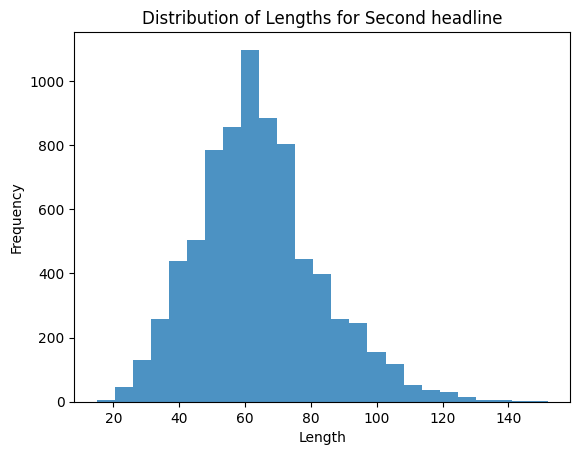

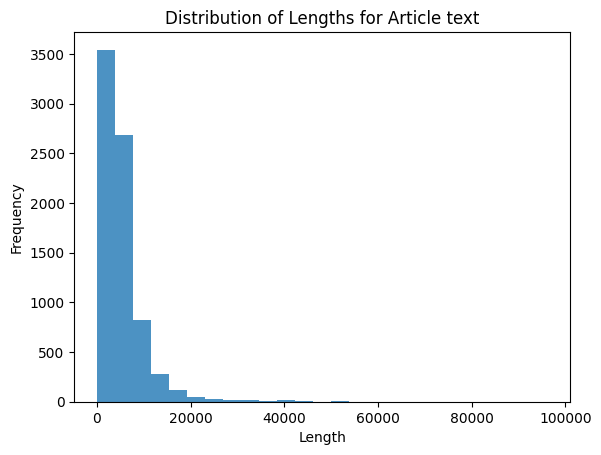

In [27]:
import matplotlib.pyplot as plt

column_list = ["Headline", "Description", "Keywords", "Second headline", "Article text"]

def plot_histogram(column_name, data):
    lengths = [len(item) for item in data[column_name]]
    plt.hist(lengths, bins=25, alpha=0.8)
    plt.title(f"Distribution of Lengths for {column_name}")
    plt.xlabel("Length")
    plt.ylabel("Frequency")
    plt.show()

for column in column_list:
    plot_histogram(column, df)

#Headline - Mauro Wang

We perform Bag-of-Words (BoW) and TF-IDF for the Headline column.


## BagOfWords

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv_headline = CountVectorizer(strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df = 2)

cv_headline.fit(df["Headline"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e19a307c820>)

In [29]:
dtm = cv_headline.transform(df["Headline"])
bow_headline = pd.DataFrame(dtm.toarray(), columns=cv_headline.get_feature_names_out())
bow_headline

!  ?  aaron  abandon  abbey  abbi  abbott  abdic  abe  abil  ...  zero  \
0     0  0      0        0      0     0       0      0    0     0  ...     0   
1     0  0      0        0      0     0       0      0    0     0  ...     0   
2     0  0      0        0      0     0       0      0    0     0  ...     0   
3     0  0      0        0      0     0       0      0    0     0  ...     0   
4     0  0      0        0      0     0       0      0    0     0  ...     0   
...  .. ..    ...      ...    ...   ...     ...    ...  ...   ...  ...   ...   
7583  0  0      0        0      0     0       0      0    0     0  ...     0   
7584  0  0      0        0      0     0       0      0    0     0  ...     0   
7585  0  0      0        0      0     0       0      0    0     0  ...     0   
7586  0  0      0        0      0     0       0      0    0     0  ...     0   
7587  0  0      0        0      0     0       0      0    0     0  ...     0   

      zidan  zimbabw  zinedin  zion  zlatan  zone  zoo  zuckerberg  zverev  
0         0        0        0     0       0     0    0           0       0  
1         0        0        0     0       0     0    0           0       0  
2         0        0        0     0       0     0    0           0       0  
3         0        0        0     0       0     0    0           0       0  
4         0        0        0     0       0     0    0           0       0  
...     ...      ...      ...   ...     ...   ...  ...         ...     ...  
7583      0        0        0     0       0     0    0           0       0  
7584      0        0        0     0       0     0    0           0       0  
7585      0        0        0     0       0     0    0           0       0  
7586      0        0        0     0       0     0    0           0       0  
7587      0        0        0     0       0     0    0           0       0  

[7588 rows x 4890 columns]

In [30]:
bow_headline.sum(axis = 0).sort_values(ascending = False)

cnn         7134
cnnpolit     489
say          414
win          337
?            330
            ... 
ny             2
qa             2
databas        2
sin            2
grassi         2
Length: 4890, dtype: int64

## Word Cloud for BagOfWord

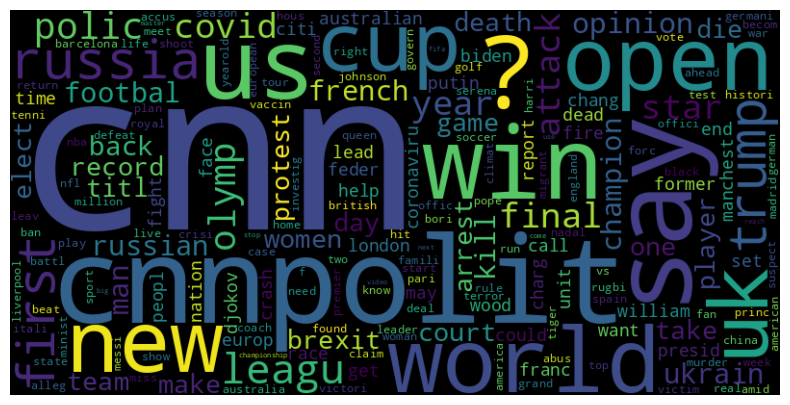

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_freq_headline = bow_headline.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud_headline = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_headline)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_headline, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** “cnn” appeared the most with 7,134 times, followed by “cnnpolit”(cnn politics) 489 times and “say” 414 times.

## TF-IDF

In [32]:
tfidf_model = TfidfVectorizer(norm = "l2", strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df=2)
tfidf_model.fit(df["Headline"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e19a5535bd0>)

In [33]:
tfidf_transformed_headline = tfidf_model.transform(df["Headline"])
tfidf_headline = pd.DataFrame(tfidf_transformed_headline.toarray(), columns = tfidf_model.get_feature_names_out())
tfidf_headline

!    ?  aaron  abandon  abbey  abbi  abbott  abdic  abe  abil  ...  \
0     0.0  0.0    0.0      0.0    0.0   0.0     0.0    0.0  0.0   0.0  ...   
1     0.0  0.0    0.0      0.0    0.0   0.0     0.0    0.0  0.0   0.0  ...   
2     0.0  0.0    0.0      0.0    0.0   0.0     0.0    0.0  0.0   0.0  ...   
3     0.0  0.0    0.0      0.0    0.0   0.0     0.0    0.0  0.0   0.0  ...   
4     0.0  0.0    0.0      0.0    0.0   0.0     0.0    0.0  0.0   0.0  ...   
...   ...  ...    ...      ...    ...   ...     ...    ...  ...   ...  ...   
7583  0.0  0.0    0.0      0.0    0.0   0.0     0.0    0.0  0.0   0.0  ...   
7584  0.0  0.0    0.0      0.0    0.0   0.0     0.0    0.0  0.0   0.0  ...   
7585  0.0  0.0    0.0      0.0    0.0   0.0     0.0    0.0  0.0   0.0  ...   
7586  0.0  0.0    0.0      0.0    0.0   0.0     0.0    0.0  0.0   0.0  ...   
7587  0.0  0.0    0.0      0.0    0.0   0.0     0.0    0.0  0.0   0.0  ...   

      zero  zidan  zimbabw  zinedin  zion  zlatan  zone  zoo  zuckerberg  \
0      0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
1      0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
2      0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
3      0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
4      0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
...    ...    ...      ...      ...   ...     ...   ...  ...         ...   
7583   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
7584   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
7585   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
7586   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
7587   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   

      zverev  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
7583     0.0  
7584     0.0  
7585     0.0  
7586     0.0  
7587     0.0  

[7588 rows x 4890 columns]

In [34]:
tfidf_headline.sum(axis = 0).sort_values(ascending = False)

cnn         447.159105
cnnpolit     98.827651
?            86.131293
say          85.463486
win          80.005573
               ...    
borough       0.674640
haringey      0.674640
eastman       0.673143
factori       0.652269
paxton        0.642304
Length: 4890, dtype: float64

## Word Cloud for TF-IDF


We perform a Word Cloud analysis on our dataset to visualize the distribution of words and identify the ones that appear most frequently in the dataset.







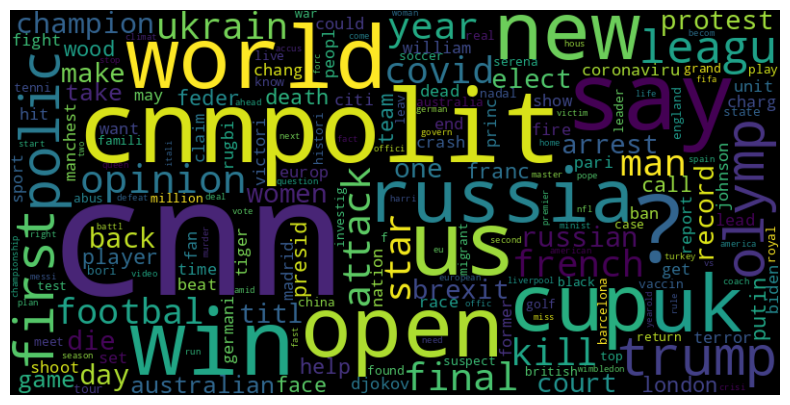

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_freq_headline = tfidf_headline.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud_headline = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_headline)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_headline, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** We identified the word “cnn” as the most frequent appearance, followed by “cnnpolit”, “?”, “say” and “win”

# Description: Lyushen Song


We perform Bag-of-Words (BoW) and TF-IDF for the Description column.







## BagOfWords

In [36]:
cv_description = CountVectorizer(strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df = 2)

cv_description.fit(df["Description"])

#print('number of `tokens`', len(cv_description.vocabulary_))
#cv_description.vocabulary_

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e19a5534ca0>)

In [37]:
dtm_description = cv_description.transform(df["Description"])
bow_description = pd.DataFrame(dtm_description.toarray(), columns=cv_description.get_feature_names_out())
bow_description

!  ?  aaron  abaaoud  abandon  abat  abba  abbey  abbi  abbott  ...  \
0     0  0      0        0        0     0     0      0     0       0  ...   
1     0  0      0        0        0     0     0      0     0       0  ...   
2     0  0      0        0        0     0     0      0     0       0  ...   
3     0  0      0        0        0     0     0      0     0       0  ...   
4     0  0      0        0        0     0     0      0     0       0  ...   
...  .. ..    ...      ...      ...   ...   ...    ...   ...     ...  ...   
7583  0  0      0        0        0     0     0      0     0       0  ...   
7584  0  0      0        0        0     0     0      0     0       0  ...   
7585  0  0      0        0        0     0     0      0     0       0  ...   
7586  0  0      0        0        0     0     0      0     0       0  ...   
7587  0  0      0        0        0     0     0      0     0       0  ...   

      zhou  zidan  zimbabw  zinedin  zlatan  zone  zoo  zoom  zurich  zverev  
0        0      0        0        0       0     0    0     0       0       0  
1        0      0        0        0       0     0    0     0       0       0  
2        0      0        0        0       0     0    0     0       0       0  
3        0      0        0        0       0     0    0     0       0       0  
4        0      0        0        0       0     0    0     0       0       0  
...    ...    ...      ...      ...     ...   ...  ...   ...     ...     ...  
7583     0      0        0        0       0     0    0     0       0       0  
7584     0      0        0        0       0     0    0     0       0       0  
7585     0      0        0        0       0     0    0     0       0       0  
7586     0      0        0        0       0     0    0     0       0       0  
7587     0      0        0        0       0     0    0     0       0       0  

[7588 rows x 7240 columns]

In [38]:
bow_description.sum(axis = 0).sort_values(ascending = False)

world      756
year       657
one        629
said       596
us         553
          ... 
sheikh       2
feminin      2
sheep        2
felix        2
inde         2
Length: 7240, dtype: int64

## Word Cloud for BagOfWord

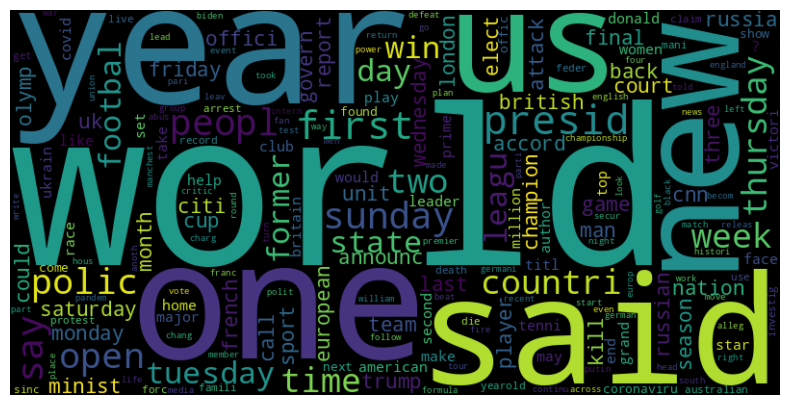

In [39]:
word_freq_description = bow_description.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud_description = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_description)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_description, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** “world” appeared 756 times, followed by “year” 657 times, and “one” 629 times.

## TF-IDF

In [40]:
tfidf_model_description = TfidfVectorizer(norm = "l2", strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df=2)
tfidf_model_description.fit(df["Description"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e19a5534700>)

In [41]:
tfidf_transformed_description = tfidf_model_description.transform(df["Description"])
tfidf_description = pd.DataFrame(tfidf_transformed_description.toarray(), columns = tfidf_model_description.get_feature_names_out())
tfidf_description

!    ?  aaron  abaaoud  abandon  abat  abba  abbey  abbi  abbott  ...  \
0     0.0  0.0    0.0      0.0      0.0   0.0   0.0    0.0   0.0     0.0  ...   
1     0.0  0.0    0.0      0.0      0.0   0.0   0.0    0.0   0.0     0.0  ...   
2     0.0  0.0    0.0      0.0      0.0   0.0   0.0    0.0   0.0     0.0  ...   
3     0.0  0.0    0.0      0.0      0.0   0.0   0.0    0.0   0.0     0.0  ...   
4     0.0  0.0    0.0      0.0      0.0   0.0   0.0    0.0   0.0     0.0  ...   
...   ...  ...    ...      ...      ...   ...   ...    ...   ...     ...  ...   
7583  0.0  0.0    0.0      0.0      0.0   0.0   0.0    0.0   0.0     0.0  ...   
7584  0.0  0.0    0.0      0.0      0.0   0.0   0.0    0.0   0.0     0.0  ...   
7585  0.0  0.0    0.0      0.0      0.0   0.0   0.0    0.0   0.0     0.0  ...   
7586  0.0  0.0    0.0      0.0      0.0   0.0   0.0    0.0   0.0     0.0  ...   
7587  0.0  0.0    0.0      0.0      0.0   0.0   0.0    0.0   0.0     0.0  ...   

      zhou  zidan  zimbabw  zinedin  zlatan  zone  zoo  zoom  zurich  zverev  
0      0.0    0.0      0.0      0.0     0.0   0.0  0.0   0.0     0.0     0.0  
1      0.0    0.0      0.0      0.0     0.0   0.0  0.0   0.0     0.0     0.0  
2      0.0    0.0      0.0      0.0     0.0   0.0  0.0   0.0     0.0     0.0  
3      0.0    0.0      0.0      0.0     0.0   0.0  0.0   0.0     0.0     0.0  
4      0.0    0.0      0.0      0.0     0.0   0.0  0.0   0.0     0.0     0.0  
...    ...    ...      ...      ...     ...   ...  ...   ...     ...     ...  
7583   0.0    0.0      0.0      0.0     0.0   0.0  0.0   0.0     0.0     0.0  
7584   0.0    0.0      0.0      0.0     0.0   0.0  0.0   0.0     0.0     0.0  
7585   0.0    0.0      0.0      0.0     0.0   0.0  0.0   0.0     0.0     0.0  
7586   0.0    0.0      0.0      0.0     0.0   0.0  0.0   0.0     0.0     0.0  
7587   0.0    0.0      0.0      0.0     0.0   0.0  0.0   0.0     0.0     0.0  

[7588 rows x 7240 columns]

In [42]:
tfidf_description.sum(axis = 0).sort_values(ascending = False)

world        107.176036
year          94.006774
one           92.985115
said          86.036889
us            80.014129
                ...    
outlook        0.441266
wray           0.438458
apocalyps      0.418280
decent         0.417495
tilt           0.393031
Length: 7240, dtype: float64

## Word Cloud for TF-IDF


We perform a Word Cloud analysis on our dataset to visualize the distribution of words and identify the ones that appear most frequently in the dataset.

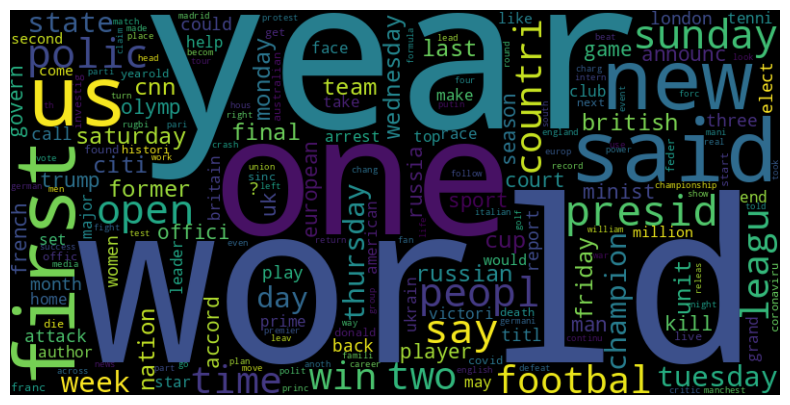

In [43]:
word_freq_description = tfidf_description.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud_description = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_description)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_description, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** We identified the word “world” as the most frequent appearance, followed by “year”, “one”, “said”, and "us".

# Second Headline Text - Leonardo Trucios

We perform Bag-of-Words (BoW) and TF-IDF for the Second Headline column.







### BagOfWords

In [44]:
cv_second_headline = CountVectorizer(strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df = 2)

cv_second_headline.fit(df["Second headline"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e19a5454dc0>)

In [45]:
print('number of `tokens for Second Headline`', len(cv_second_headline.vocabulary_))

number of `tokens for Second Headline` 4928


In [46]:
dtm_2 = cv_second_headline.transform(df["Second headline"])
bow_second_headline = pd.DataFrame(dtm_2.toarray(), columns=cv_second_headline.get_feature_names_out())
bow_second_headline

!  ?  aaron  abandon  abbey  abbi  abdeslam  abe  abil  abl  ...  zero  \
0     0  0      0        0      0     0         0    0     0    0  ...     0   
1     0  0      0        0      0     0         0    0     0    0  ...     0   
2     0  0      0        0      0     0         0    0     0    0  ...     0   
3     0  0      0        0      0     0         0    0     0    0  ...     0   
4     0  0      0        0      0     0         0    0     0    0  ...     0   
...  .. ..    ...      ...    ...   ...       ...  ...   ...  ...  ...   ...   
7583  0  0      0        0      0     0         0    0     0    0  ...     0   
7584  0  0      0        0      0     0         0    0     0    0  ...     0   
7585  0  0      0        0      0     0         0    0     0    0  ...     0   
7586  0  0      0        0      0     0         0    0     0    0  ...     0   
7587  0  0      0        0      0     0         0    0     0    0  ...     0   

      zidan  zimbabw  zinedin  zion  zlatan  zone  zoo  zuckerberg  zverev  
0         0        0        0     0       0     0    0           0       0  
1         0        0        0     0       0     0    0           0       0  
2         0        0        0     0       0     0    0           0       0  
3         0        0        0     0       0     0    0           0       0  
4         0        0        0     0       0     0    0           0       0  
...     ...      ...      ...   ...     ...   ...  ...         ...     ...  
7583      0        0        0     0       0     0    0           0       0  
7584      0        0        0     0       0     0    0           0       0  
7585      0        0        0     0       0     0    0           0       0  
7586      0        0        0     0       0     0    0           0       0  
7587      0        0        0     0       0     0    0           0       0  

[7588 rows x 4928 columns]

In [47]:
bow_second_headline.sum(axis = 0).sort_values(ascending = False).head()

say      491
?        345
win      339
us       323
world    297
dtype: int64

## Word Cloud for BagOfWord

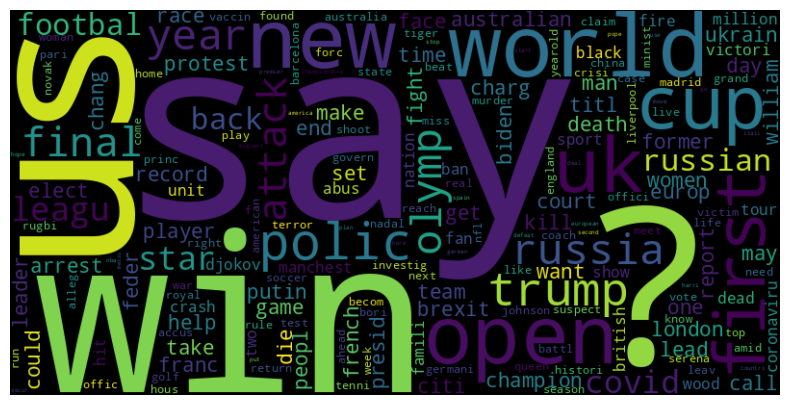

In [48]:
word_freq = bow_second_headline.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** “say” appeared 491 times, followed by “?” 345 times, and “win” that appeared 339 times.

## TD-IDF

In [49]:
tfidf_model_second_headline = TfidfVectorizer(norm = "l2", strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df=2)
tfidf_model_second_headline.fit(df["Second headline"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e19a5450f70>)

In [50]:
tfidf_transformed_second_headline = tfidf_model_second_headline.transform(df["Second headline"])
tfidf_second_headline = pd.DataFrame(tfidf_transformed_second_headline.toarray(), columns = tfidf_model_second_headline.get_feature_names_out())
tfidf_second_headline

!    ?  aaron  abandon  abbey  abbi  abdeslam  abe  abil  abl  ...  \
0     0.0  0.0    0.0      0.0    0.0   0.0       0.0  0.0   0.0  0.0  ...   
1     0.0  0.0    0.0      0.0    0.0   0.0       0.0  0.0   0.0  0.0  ...   
2     0.0  0.0    0.0      0.0    0.0   0.0       0.0  0.0   0.0  0.0  ...   
3     0.0  0.0    0.0      0.0    0.0   0.0       0.0  0.0   0.0  0.0  ...   
4     0.0  0.0    0.0      0.0    0.0   0.0       0.0  0.0   0.0  0.0  ...   
...   ...  ...    ...      ...    ...   ...       ...  ...   ...  ...  ...   
7583  0.0  0.0    0.0      0.0    0.0   0.0       0.0  0.0   0.0  0.0  ...   
7584  0.0  0.0    0.0      0.0    0.0   0.0       0.0  0.0   0.0  0.0  ...   
7585  0.0  0.0    0.0      0.0    0.0   0.0       0.0  0.0   0.0  0.0  ...   
7586  0.0  0.0    0.0      0.0    0.0   0.0       0.0  0.0   0.0  0.0  ...   
7587  0.0  0.0    0.0      0.0    0.0   0.0       0.0  0.0   0.0  0.0  ...   

      zero  zidan  zimbabw  zinedin  zion  zlatan  zone  zoo  zuckerberg  \
0      0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
1      0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
2      0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
3      0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
4      0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
...    ...    ...      ...      ...   ...     ...   ...  ...         ...   
7583   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
7584   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
7585   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
7586   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   
7587   0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0         0.0   

      zverev  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
7583     0.0  
7584     0.0  
7585     0.0  
7586     0.0  
7587     0.0  

[7588 rows x 4928 columns]

In [51]:
tfidf_second_headline.sum(axis = 0).sort_values(ascending = False).head()

say      97.541147
?        87.533650
win      78.488056
us       76.234860
world    73.961081
dtype: float64

## Word Cloud for TF-IDF


We perform a Word Cloud analysis on our dataset to visualize the distribution of words and identify the ones that appear most frequently in the dataset.

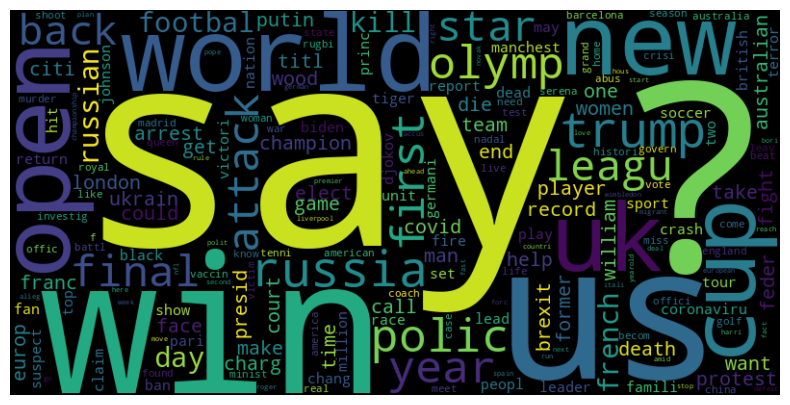

In [52]:
word_freq = tfidf_second_headline.sum(axis = 0).sort_values(ascending = False)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** We identified the word “say” as the most frequent appearance, followed by “?”, “win”, “us” and “world”.

# Keywords - Ashley Mercado

We perform Bag-of-Words (BoW) and TF-IDF for the Keywords column.







## BagOfWords

In [53]:
cv_keywords = CountVectorizer(strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df = 2)

cv_keywords.fit(df["Keywords"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e19a54501f0>)

In [54]:
print('number of `tokens`', len(cv_keywords.vocabulary_))

number of `tokens` 5159


In [55]:
dtm = cv_keywords.transform(df["Keywords"])
bow_keywords = pd.DataFrame(dtm.toarray(), columns=cv_keywords.get_feature_names_out())
bow_keywords

!  ?  aaron  abaaoud  abandon  abbey  abbi  abbott  abdelhamid  \
0     0  0      0        0        0      0     0       0           0   
1     0  0      0        0        0      0     0       0           0   
2     0  0      0        0        0      0     0       0           0   
3     0  0      0        0        0      0     0       0           0   
4     0  0      0        0        0      0     0       0           0   
...  .. ..    ...      ...      ...    ...   ...     ...         ...   
7583  0  0      0        0        0      0     0       0           0   
7584  0  0      0        0        0      0     0       0           0   
7585  0  0      0        0        0      0     0       0           0   
7586  0  0      0        0        0      0     0       0           0   
7587  0  0      0        0        0      0     0       0           0   

      abdeslam  ...  zhang  zidan  zimbabw  zinedin  zion  zlatan  zone  zoo  \
0            0  ...      0      0        0        0     0       0     0    0   
1            0  ...      0      0        0        0     0       0     0    0   
2            0  ...      0      0        0        0     0       0     0    0   
3            0  ...      0      0        0        0     0       0     0    0   
4            0  ...      0      0        0        0     0       0     0    0   
...        ...  ...    ...    ...      ...      ...   ...     ...   ...  ...   
7583         0  ...      0      0        0        0     0       0     0    0   
7584         0  ...      0      0        0        0     0       0     0    0   
7585         0  ...      0      0        0        0     0       0     0    0   
7586         0  ...      0      0        0        0     0       0     0    0   
7587         0  ...      0      0        0        0     0       0     0    0   

      zuckerberg  zverev  
0              0       0  
1              0       0  
2              0       0  
3              0       0  
4              0       0  
...          ...     ...  
7583           0       0  
7584           0       0  
7585           0       0  
7586           0       0  
7587           0       0  

[7588 rows x 5159 columns]

In [56]:
bow_keywords.sum(axis = 0).sort_values(ascending = False)

cnn           7147
europ         2191
sport         1322
footbal       1195
us             758
              ... 
ballestero       2
choke            2
rihanna          2
heroin           2
scooter          2
Length: 5159, dtype: int64

## Word Cloud for BagOfWord

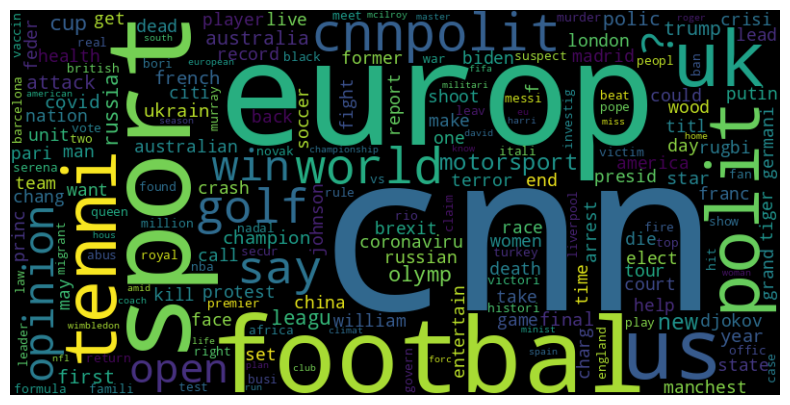

In [57]:
word_freq = bow_keywords.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** “cnn” appeared 7,147 times, followed by “europ” 2,191 times, “sport” came in third with 1,322 times.

## TF-IDF

In [58]:
tfidf_keywords_model = TfidfVectorizer(norm = "l2", strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df=2)
tfidf_keywords_model.fit(df["Keywords"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e19a59112d0>)

In [59]:
tfidf_transformed_keywords = tfidf_keywords_model.transform(df["Keywords"])
tfidf_keywords = pd.DataFrame(tfidf_transformed_keywords.toarray(), columns = tfidf_keywords_model.get_feature_names_out())
tfidf_keywords

!    ?  aaron  abaaoud  abandon  abbey  abbi  abbott  abdelhamid  \
0     0.0  0.0    0.0      0.0      0.0    0.0   0.0     0.0         0.0   
1     0.0  0.0    0.0      0.0      0.0    0.0   0.0     0.0         0.0   
2     0.0  0.0    0.0      0.0      0.0    0.0   0.0     0.0         0.0   
3     0.0  0.0    0.0      0.0      0.0    0.0   0.0     0.0         0.0   
4     0.0  0.0    0.0      0.0      0.0    0.0   0.0     0.0         0.0   
...   ...  ...    ...      ...      ...    ...   ...     ...         ...   
7583  0.0  0.0    0.0      0.0      0.0    0.0   0.0     0.0         0.0   
7584  0.0  0.0    0.0      0.0      0.0    0.0   0.0     0.0         0.0   
7585  0.0  0.0    0.0      0.0      0.0    0.0   0.0     0.0         0.0   
7586  0.0  0.0    0.0      0.0      0.0    0.0   0.0     0.0         0.0   
7587  0.0  0.0    0.0      0.0      0.0    0.0   0.0     0.0         0.0   

      abdeslam  ...  zhang  zidan  zimbabw  zinedin  zion  zlatan  zone  zoo  \
0          0.0  ...    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
1          0.0  ...    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
2          0.0  ...    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
3          0.0  ...    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
4          0.0  ...    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
...        ...  ...    ...    ...      ...      ...   ...     ...   ...  ...   
7583       0.0  ...    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
7584       0.0  ...    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
7585       0.0  ...    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
7586       0.0  ...    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   
7587       0.0  ...    0.0    0.0      0.0      0.0   0.0     0.0   0.0  0.0   

      zuckerberg  zverev  
0            0.0     0.0  
1            0.0     0.0  
2            0.0     0.0  
3            0.0     0.0  
4            0.0     0.0  
...          ...     ...  
7583         0.0     0.0  
7584         0.0     0.0  
7585         0.0     0.0  
7586         0.0     0.0  
7587         0.0     0.0  

[7588 rows x 5159 columns]

In [60]:
tfidf_keywords.sum(axis = 0).sort_values(ascending = False)

cnn          417.857243
europ        282.626789
footbal      194.851146
sport        190.693581
us           132.783489
                ...    
edam           0.306891
ds             0.306891
sebastien      0.306891
buemi          0.306891
foley          0.195931
Length: 5159, dtype: float64

## Word Cloud for TF-IDF


We perform a Word Cloud analysis on our dataset to visualize the distribution of words and identify the ones that appear most frequently in the dataset.

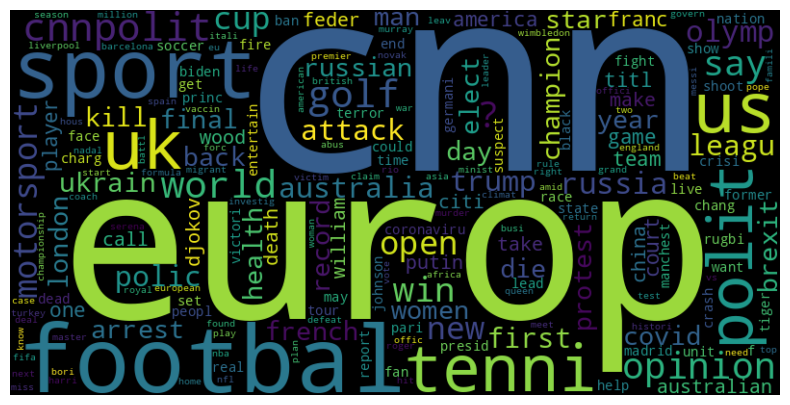

In [61]:
word_freq = tfidf_keywords.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** We identified the word “cnn” as the most frequent appearance, followed by “europ”,  “footbal”, “sport”, and “us”.

# **Article Text - Pengru Lin**

We perform Bag-of-Words (BoW) and TF-IDF for the Article Text column.







## BagOfWords


In [62]:
cv_artext = CountVectorizer(strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df = 2)

cv_artext.fit(df["Article text"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e192332cf70>)

In [63]:
dtm_artext = cv_artext.transform(df["Article text"])
bow_artext = pd.DataFrame(dtm_artext.toarray(), columns=cv_artext.get_feature_names_out())
bow_artext

!  12  1212  12hour  34  ?  _cerysss  aa  aaa  aachen  ...  zuwara  \
0     0   0     0       0   0  0         0   0    0       0  ...       0   
1     0   0     0       0   0  0         0   0    0       0  ...       0   
2     0   0     0       0   0  0         0   0    0       0  ...       0   
3     0   0     0       0   0  1         0   0    0       0  ...       0   
4     0   0     0       0   0  0         0   0    0       0  ...       0   
...  ..  ..   ...     ...  .. ..       ...  ..  ...     ...  ...     ...   
7583  1   0     0       0   0  1         0   0    0       0  ...       0   
7584  0   0     0       0   0  0         0   0    0       0  ...       0   
7585  0   0     0       0   0  0         0   0    0       0  ...       0   
7586  0   0     0       0   0  2         0   0    0       0  ...       0   
7587  0   0     0       0   0  0         0   0    0       0  ...       0   

      zuzana  zverev  zvezda  zvonareva  zwart  zwickau  zyl  zyryanov  \
0          0       0       0          0      0        0    0         0   
1          0       0       0          0      0        0    0         0   
2          0       0       0          0      0        0    0         0   
3          0       0       0          0      0        0    0         0   
4          0       0       0          0      0        0    0         0   
...      ...     ...     ...        ...    ...      ...  ...       ...   
7583       0       0       0          0      0        0    0         0   
7584       0       0       0          0      0        0    0         0   
7585       0       0       0          0      0        0    0         0   
7586       0       0       0          0      0        0    0         0   
7587       0       0       0          0      0        0    0         0   

      zyuganov  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
7583         0  
7584         0  
7585         0  
7586         0  
7587         0  

[7588 rows x 55300 columns]

In [64]:
bow_artext.sum(axis = 0).sort_values(ascending = False)

photo             43287
said              32751
caption           31357
year              16601
world             15864
                  ...  
rivalryfootbal        2
rivalrydjokov         2
controlbut            2
ritzi                 2
relationsbut          2
Length: 55300, dtype: int64

## Word Cloud for BagOfWord

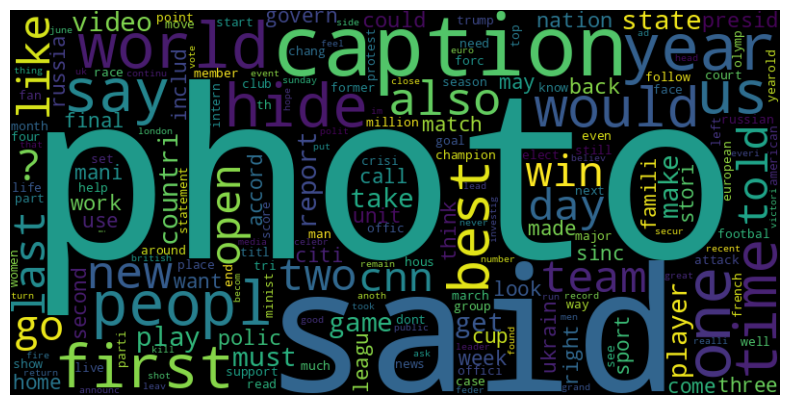

In [65]:
word_freq = bow_artext.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** “photo” appeared 43,287 times, followed by “said” 32,751 times, and “caption” came in third with 31,357 times.

## TF-IDF

In [66]:
tfidf_artext_model = TfidfVectorizer(norm = "l2", strip_accents = "ascii", tokenizer = lambda x: stemming_processing(x), min_df=2)
tfidf_artext_model.fit(df["Article text"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=2, strip_accents='ascii',
                tokenizer=<function <lambda> at 0x7e18fd4eff40>)

In [67]:
tfidf_transformed_artext = tfidf_artext_model.transform(df["Article text"])
tfidf_artext = pd.DataFrame(tfidf_transformed_artext.toarray(), columns = tfidf_artext_model.get_feature_names_out())
tfidf_artext

!   12  1212  12hour   34         ?  _cerysss   aa  aaa  aachen  \
0     0.000000  0.0   0.0     0.0  0.0  0.000000       0.0  0.0  0.0     0.0   
1     0.000000  0.0   0.0     0.0  0.0  0.000000       0.0  0.0  0.0     0.0   
2     0.000000  0.0   0.0     0.0  0.0  0.000000       0.0  0.0  0.0     0.0   
3     0.000000  0.0   0.0     0.0  0.0  0.007705       0.0  0.0  0.0     0.0   
4     0.000000  0.0   0.0     0.0  0.0  0.000000       0.0  0.0  0.0     0.0   
...        ...  ...   ...     ...  ...       ...       ...  ...  ...     ...   
7583  0.020018  0.0   0.0     0.0  0.0  0.013533       0.0  0.0  0.0     0.0   
7584  0.000000  0.0   0.0     0.0  0.0  0.000000       0.0  0.0  0.0     0.0   
7585  0.000000  0.0   0.0     0.0  0.0  0.000000       0.0  0.0  0.0     0.0   
7586  0.000000  0.0   0.0     0.0  0.0  0.017301       0.0  0.0  0.0     0.0   
7587  0.000000  0.0   0.0     0.0  0.0  0.000000       0.0  0.0  0.0     0.0   

      ...  zuwara  zuzana  zverev  zvezda  zvonareva  zwart  zwickau  zyl  \
0     ...     0.0     0.0     0.0     0.0        0.0    0.0      0.0  0.0   
1     ...     0.0     0.0     0.0     0.0        0.0    0.0      0.0  0.0   
2     ...     0.0     0.0     0.0     0.0        0.0    0.0      0.0  0.0   
3     ...     0.0     0.0     0.0     0.0        0.0    0.0      0.0  0.0   
4     ...     0.0     0.0     0.0     0.0        0.0    0.0      0.0  0.0   
...   ...     ...     ...     ...     ...        ...    ...      ...  ...   
7583  ...     0.0     0.0     0.0     0.0        0.0    0.0      0.0  0.0   
7584  ...     0.0     0.0     0.0     0.0        0.0    0.0      0.0  0.0   
7585  ...     0.0     0.0     0.0     0.0        0.0    0.0      0.0  0.0   
7586  ...     0.0     0.0     0.0     0.0        0.0    0.0      0.0  0.0   
7587  ...     0.0     0.0     0.0     0.0        0.0    0.0      0.0  0.0   

      zyryanov  zyuganov  
0          0.0       0.0  
1          0.0       0.0  
2          0.0       0.0  
3          0.0       0.0  
4          0.0       0.0  
...        ...       ...  
7583       0.0       0.0  
7584       0.0       0.0  
7585       0.0       0.0  
7586       0.0       0.0  
7587       0.0       0.0  

[7588 rows x 55300 columns]

In [68]:
tfidf_artext.sum(axis = 0).sort_values(ascending = False).head()

said       240.525741
photo      188.318108
caption    170.431829
world      137.285170
year       135.635919
dtype: float64

## Word Cloud for TF-IDF

We perform a Word Cloud analysis on our dataset to visualize the distribution of words and identify the ones that appear most frequently in the dataset.

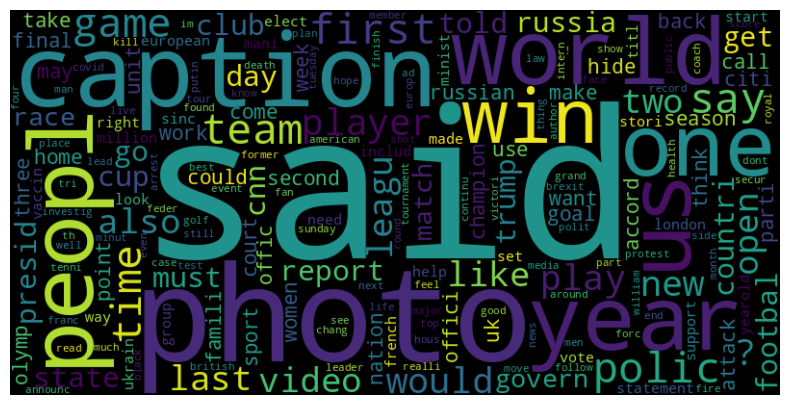

In [69]:
word_freq = tfidf_artext.sum(axis=0).sort_values(ascending=False).to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Description of Results:** “said” is the most frequent word, followed by “photo”, “caption”, “world”, and “year”. This is interesting because in BoW, “photo” was the most frequent word.

#Modeling

We perform sentiment analysis using different methodologies. Firstly, we conduct an analysis with NLTK's SentimentIntensityAnalyzer, which is applied to all five columns. The results are then averaged to reduce noise. To visualize the sentiment, we can plot it on a timeline to observe any consistent trends or identify any noticeable changes in the sentiment of the news. We then use the SentimentIntensityAnalyzer to identify very positive, negative, and neutral sentences, allowing us to perform vector comparison using cosine similarity to gain an unsupervised understanding of the sentiment in each row. Afterwards, we use TextBlob to obtain sentiment with another sentiment analysis tool to obtain a broader prediction. Given the three predictions, we can identify instances where the predictions are inconsistent. We then take the mode for these predictions and set 0 when all predictions are different. Finally, we can perform market basket analysis using the Author, category and section data to discover interesting patterns.

## Sentiment Analysis

We start by using the NLTK SentimentIntensityAnalyzer package, which returns 4 scores: one for negative, one for positive, one for neutral, and one compound. With these scores, we can predict the sentiment for all columns and gain an understanding of the sentiment of CNN.

In [70]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [71]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['neu'] > scores['neg'] and scores['neu'] > scores['pos']:
        sentiment = 0
    else:
        sentiment = 1 if scores['pos'] > scores['neg'] else -1
    return sentiment

In [72]:
for text in column_list:
    df[f'Supervised_Sentiment_{text}'] = df[text].apply(get_sentiment)

df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  \
8850   story highlightsthe domestic incident occurred...   
4731   cnnun human rights experts urged iranian autho...   
25132  story highlightsslobodan praljak a former croa...   
18330  story highlights a mourning march will be held...   
13314  story highlightsbritains andy murray books wim...   

       Supervised_Sentiment_Headline  Supervised_Sentiment_Description  \
8850                               0                                 0   
4731                               0                                 0   
25132                              0                                 0   
18330                             -1                                 0   
13314                              0                                 0   

       Supervised_Sentiment_Keywords  Supervised_Sentiment_Second headline  \
8850                               0                                     0   
4731                               0                                     0   
25132                              0                                    -1   
18330                              0                                     0   
13314                              0                                     0   

       Supervised_Sentiment_Article text  
8850                                   0  
4731                                   0  
25132                                  0  
18330                                  0  
13314                                  0

We average the results of each column by taking the mode of the 5 columns.






In [73]:
results_columns = ['Supervised_Sentiment_Headline', 'Supervised_Sentiment_Description', 'Supervised_Sentiment_Keywords', 'Supervised_Sentiment_Second headline', 'Supervised_Sentiment_Article text']

df['Supervised_Average_Sentiment'] = df[results_columns].mode(axis=1)[0]

df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  \
8850   story highlightsthe domestic incident occurred...   
4731   cnnun human rights experts urged iranian autho...   
25132  story highlightsslobodan praljak a former croa...   
18330  story highlights a mourning march will be held...   
13314  story highlightsbritains andy murray books wim...   

       Supervised_Sentiment_Headline  Supervised_Sentiment_Description  \
8850                               0                                 0   
4731                               0                                 0   
25132                              0                                 0   
18330                             -1                                 0   
13314                              0                                 0   

       Supervised_Sentiment_Keywords  Supervised_Sentiment_Second headline  \
8850                               0                                     0   
4731                               0                                     0   
25132                              0                                    -1   
18330                              0                                     0   
13314                              0                                     0   

       Supervised_Sentiment_Article text  Supervised_Average_Sentiment  
8850                                   0                             0  
4731                                   0                             0  
25132                                  0                             0  
18330                                  0                             0  
13314                                  0                             0

We drop the columns since they are now redundant.






In [74]:
df.drop(columns=results_columns, axis = 1, inplace=True)
df

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   
...                                                  ...            ...   
28788                               Nick Friend, for CNN        2019/04   
7927                                     Lauren Lee, CNN        2020/11   
34719                                   Matias Grez, CNN        2021/03   
3058                  Jessie Yeung and Steve George, CNN        2021/09   
31609                            Christina Maxouris, CNN        2020/01   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   
...        ...         ...                                                ...   
28788    sport    football  premier league footballers boycott social medi...   
7927      news          us  detroits human atlas british artist reveals th...   
34719    sport    football  champions league quarterfinal draw bayern muni...   
3058      news       china  china and the us are polar opposites on gun co...   
31609     news          uk  missing child new mexico fbi is on the hunt fo...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   
...                                                  ...   
28788  professional footballers in england and wales ...   
7927   marcus lyons latest project profiles some of d...   
34719            its crunch time in the champions league   
3058   last week a yearold man stormed into a law fir...   
31609  the fbi has asked the publics help in locating...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   
...                                                  ...   
28788  football premier league footballers boycott so...   
7927   us detroits human atlas british artist reveals...   
34719  football champions league quarterfinal draw ba...   
3058   china china and the us are polar opposites on ...   
31609  uk missing child new mexico fbi is on the hunt...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   
...                                                  ...   
28788  enough is enough footballers boycott social me...   
7927   british artist creates a human atlas of detroi...   
34719  champions league quarterfinal draw bayern muni...   
3058   china and the us were both born from armed con...   
31609  the fbi is on the hunt for a man who allegedly...   

             

We plot the distribution of the predicted sentiment to observe if they are evenly distributed.







In [75]:
import plotly.express as px

fig = px.histogram(df, x="Supervised_Average_Sentiment")

fig.show()

Our previous analysis revealed a skewed negative sentiment in the articles published by CNN. However, with the introduction of neutral sentiment, we now observe that neutral sentiment predominates. This finding is not entirely surprising, considering that news outlets strive to be factual and unbiased when sharing news. Nevertheless, we still observe a few cases of positive and negative sentiments, which might be attributed to noise in the modeling prediction.

In [76]:
import plotly.express as px

df_grouped = df.groupby("Date published")["Supervised_Average_Sentiment"].mean().reset_index()

fig = px.line(df_grouped, x="Date published", y="Supervised_Average_Sentiment")

fig.show()

Plotting a line graph of the average sentiment per month reveals significant fluctuations, resembling the volatility of stock returns. Interestingly, the peaks and valleys lack any discernible recurring pattern, suggesting the changes in sentiment may not be primarily driven by seasonality. This possibility warrants further investigation, which we will undertake in the second deliverable.

## Vector Comparison

*Mauro and Pengru completed the Vector Comparsion*

In order to obtain an unsupervised sentiment analysis, we decided to use the SentimentIntensityAnalyzer to obtain baseline sentences with extremely high positive, negative, and neutral sentiment. By using them as a baseline, we can calculate the cosine similarity to determine their similarity. We considered using GLOVE 50 or a model trained by ourselves, but given the type of data we have, we decided to train a model ourselves.

In [77]:
import gensim.downloader as api
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

def tokenize_articles(df_column):
    tokenized_articles = []
    for article in df_column:
        tokens = word_tokenize(article)
        tokenized_articles.append(tokens)
    return tokenized_articles

tokenized_articles = tokenize_articles(df["Article text"])

model_word2vec = Word2Vec(sentences=tokenized_articles, vector_size=100, window=5, min_count=1, workers=4)
model_word2vec = model_word2vec.wv

#model_word2vec = api.load("glove-wiki-gigaword-50")

We base the positive sentence and negative baseline sentences as the following, which are obrainted from using the NLTK sentiment analyzer to get the words that gives us the highest positive and negative sentiment.

In [78]:
positive_sentence = "love happy joy smile laughter hope kindness gratitude blessing wonderful fantastic awesome amazing beautiful bright brilliant cheerful delightful excellent fabulous glorious harmony incredible jubilant lucky marvelous miracle optimistic paradise perfect radiant serene splendid sunshine terrific vibrant victorious vivacious wondrous bliss grace euphoria felicity charming exhilarating magnificent sensational delicious bounty savor glow genuine heartfelt ecstasy effervescent inspiring refreshing uplifting tranquil unforgettable sunny rainbow blissful rejoice thriving splendor laughter festive sparkling enchanting captivating festivity jolly cheer fun celebration grateful abundance brighten merry delight gleeful gladness satisfaction harmonious upbeat playful exultant radiate exuberant jovial heartwarming courageous spirited dreamy pride triumphant happiness affectionate amiable angelic blissful buoyant bubbly carefree charismatic chirpy colorful comical compassionate confident content convivial dazzling divine ebullient ecstatic eloquent enjoyable enthusiastic euphoric exuberant faithful fascinating friendly frisky fun-loving gentle glamorous gleaming glorious grateful hilarious humorous jocund joyful jubilant lovable luminous magnetic mirthful nostalgic optimistic passionate peaceful pleasant radiant rapturous resplendent sanguine serene soothing sparkling spirited sprightly stimulating sunny sweet tender thankful tranquil vibrant vivacious warmhearted whimsical zestful zesty uplifting exhilarating ecstatic joyous exultant merry blithe elated overjoyed euphoric radiant blissful thrilled contented satisfied gratified gleeful jubilant enthralled jovial delighted ecstatic cheerful jolly buoyant sunny mirthful glad"

analyzer.polarity_scores(positive_sentence)

{'neg': 0.0, 'neu': 0.09, 'pos': 0.91, 'compound': 0.9999}

In [79]:
positive_sentence = word_tokenize(positive_sentence)

In [80]:
negative_sentence = "abandoned, abhorrent, abominable, abrasive, abrupt, absurd, abysmal, adverse, agonizing, aimless, alienated, aloof, ambiguous, angry, annoying, anxious, apathetic, appalling, arrogant, atrocious, awful, awkward, barren, belligerent, bewildered, bitter, bland, bleak, blunt, boorish, boring, brash, brittle, brutal, callous, chaotic, clumsy, coarse, cold, colorless, complacent, complicated, confrontational, confused, contradictory, corrosive, corrupt, cowardly, crass, crazy, creepy, criminal, cruel, cumbersome, cynical, dangerous, dark, deadly, deceitful, defeated, deficient, dejected, delicate, delirious, demoralized, deplorable, depressing, deprived, desolate, desperate, destructive, detached, detrimental, devastating, diabolic, difficult, dim, dirty, disappointing, disastrous, discontented, discouraging, disgraceful, disgusting, dishonest, disillusioned, disinterested, disloyal, dismal, disorderly, disorganized, displeasing, disrespectful, dissatisfied, distasteful, distraught, distressed, disturbing, dreadful, dreary, dull, embarrassing, emotionless, empty, enraged, envious, erratic, exasperating, exhausting, exploitative, extraneous, fail, fake, false, fearful, feeble, filthy, flawed, foolish, forlorn, fragile, frightening, frustrating, furious, futile, gloomy, grave, greedy, grim, grimy, gross, gruesome, guilty, hapless, hard, harsh, hateful, heartbreaking, heavy, hideous, hopeless, horrible, hostile, humiliating, hurtful, hysterical, icky, idiotic, ignorant, ill, immature, imperfect, impossible, impotent, impulsive, inactive, incoherent, incompetent, inconsiderate, inconsistent, indecisive, indifferent, ineffective, inefficient, inferior, infernal, infuriating, insecure, insidious, insignificant, insincere, insipid, insufferable, intolerant, irrational, irresponsible, irritating, joyless, lame, lazy, lethal, lonely, lousy, ludicrous, malicious, malodorous, meaningless, mediocre, melancholic, miserable, miserly, monotonous, monstrous, moody, morbid, mortifying, mundane, murky, naive, narrow, nasty, negative, neurotic, nightmarish, nonchalant, nondescript, nonexistent, nonproductive, nonsensical, notorious, noxious, obnoxious, obscene, obsessive, obstructive, odd, offensive, ominous, oppressive, outrageous, overwhelming, painful, pathetic, petty, pitiful, poor, preposterous, pretentious, primitive, prickly, procrastinating, provocative, pessimistic, puny, questionable, quirky, radical, rash, ratty, repulsive, resentful, restless, ridiculous, rigid, rough, rude, ruthless, sad, savage, scandalous, scary, selfish, senseless, shameful, shameless, shocking, shoddy, silly, sinister, sloppy, slovenly, slow, sluggish, smelly, sneaky, snobbish, sorrowful, sorry, spiteful, stale, stupid, submissive, sulky, sullen, suspicious, tacky, tasteless, tedious, temperamental, tense, terrible, terrifying, threatening, timid, tiresome, toxic, tragic, trashy, troublesome, twisted, ugly, unbearable, unfair, unhappy, unhealthy, unpleasant, unpredictable, unreasonable, unreliable, unstable, unsure, unworthy, upsetting, useless, vague, vicious, vile, villainous, vindictive, violent, vulgar, wary, weary, weird, wicked, woeful, worthless, wretched"

analyzer.polarity_scores(negative_sentence)

{'neg': 0.804, 'neu': 0.192, 'pos': 0.004, 'compound': -0.9999}

In [81]:
negative_sentence = word_tokenize(negative_sentence)

In [82]:
neutral_sentence = "The article is going on as usual and nothing happened. The CNN news segment featured a report on global weather patterns. CNN aired a documentary exploring the history of modern architecture. During the CNN broadcast, journalists provided live coverage of a scientific conference. CNN reporters interviewed experts on the impact of social media on modern politics. Viewers tuned in to CNN to watch a panel discussion on environmental conservation efforts. A CNN journalist reported on the latest developments in medical research during the evening news segment."

analyzer.polarity_scores(neutral_sentence)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [83]:
neutral_sentence = word_tokenize(neutral_sentence)

We define a function that allows us to calculate the cosine similarity between our sentences and the baseline, retaining the highest as our predictions. This approach differs from what we did in class due to the introduction of neutral sentiment, and we believe it to be a better way to perform sentiment prediction given our limited knowledge.

In [84]:
def get_sentiment_score(sentence):
    if not sentence.strip():
      return None

    pos = model_word2vec.n_similarity(word_tokenize(sentence), positive_sentence)
    neg = model_word2vec.n_similarity(word_tokenize(sentence), negative_sentence)
    neu = model_word2vec.n_similarity(word_tokenize(sentence), neutral_sentence)
    if max(neu, pos, neg) == pos:
        sentiment = 1
    elif max(neu, pos, neg) == neu:
        sentiment = 0
    else:
        sentiment = -1
    return sentiment

for text in column_list:
    df[f'Unsupervised_Sentiment_{text}'] = df[text].apply(get_sentiment_score)

df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  \
8850   story highlightsthe domestic incident occurred...   
4731   cnnun human rights experts urged iranian autho...   
25132  story highlightsslobodan praljak a former croa...   
18330  story highlights a mourning march will be held...   
13314  story highlightsbritains andy murray books wim...   

       Supervised_Average_Sentiment  Unsupervised_Sentiment_Headline  \
8850                              0                                0   
4731                              0                                0   
25132                             0                                0   
18330                             0                               -1   
13314                             0                                1   

       Unsupervised_Sentiment_Description  Unsupervised_Sentiment_Keywords  \
8850                                  0.0                                0   
4731                                  0.0                                0   
25132                                 0.0                                0   
18330                                 0.0                                0   
13314                                 0.0                                1   

       Unsupervised_Sentiment_Second headline  \
8850                                       -1   
4731                                        0   
25132                                       0   
18330                                      -1   
13314                                       1   

       Unsupervised_Sentiment_Article text  
8850                                   0.0  
4731                                   0.0  
25132                                  0.0  
18330                                  0.0  
13314                                  0.0

In [85]:
df.columns

Index(['Author', 'Date published', 'Category', 'Section', 'Headline',
       'Description', 'Keywords', 'Second headline', 'Article text',
       'Supervised_Average_Sentiment', 'Unsupervised_Sentiment_Headline',
       'Unsupervised_Sentiment_Description', 'Unsupervised_Sentiment_Keywords',
       'Unsupervised_Sentiment_Second headline',
       'Unsupervised_Sentiment_Article text'],
      dtype='object')

We average the results of the column by taking the mode of the 5 columns



In [86]:
unsupervised_columns = ["Unsupervised_Sentiment_Headline","Unsupervised_Sentiment_Description", "Unsupervised_Sentiment_Keywords", "Unsupervised_Sentiment_Second headline", "Unsupervised_Sentiment_Article text"]

df["Unsupervised_Average_Sentiment"] = df[unsupervised_columns].mode(axis=1)[0]

df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  \
8850   story highlightsthe domestic incident occurred...   
4731   cnnun human rights experts urged iranian autho...   
25132  story highlightsslobodan praljak a former croa...   
18330  story highlights a mourning march will be held...   
13314  story highlightsbritains andy murray books wim...   

       Supervised_Average_Sentiment  Unsupervised_Sentiment_Headline  \
8850                              0                                0   
4731                              0                                0   
25132                             0                                0   
18330                             0                               -1   
13314                             0                                1   

       Unsupervised_Sentiment_Description  Unsupervised_Sentiment_Keywords  \
8850                                  0.0                                0   
4731                                  0.0                                0   
25132                                 0.0                                0   
18330                                 0.0                                0   
13314                                 0.0                                1   

       Unsupervised_Sentiment_Second headline  \
8850                                       -1   
4731                                        0   
25132                                       0   
18330                                      -1   
13314                                       1   

       Unsupervised_Sentiment_Article text  Unsupervised_Average_Sentiment  
8850                                   0.0                             0.0  
4731                                   0.0                             0.0  
25132                                  0.0                             0.0  
18330                                  0.0                             0.0  
13314                                  0.0                             1.0

We drop the columns since they are now redundant.





In [87]:
df.drop(columns=unsupervised_columns, axis = 1, inplace=True)
df

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   
...                                                  ...            ...   
28788                               Nick Friend, for CNN        2019/04   
7927                                     Lauren Lee, CNN        2020/11   
34719                                   Matias Grez, CNN        2021/03   
3058                  Jessie Yeung and Steve George, CNN        2021/09   
31609                            Christina Maxouris, CNN        2020/01   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   
...        ...         ...                                                ...   
28788    sport    football  premier league footballers boycott social medi...   
7927      news          us  detroits human atlas british artist reveals th...   
34719    sport    football  champions league quarterfinal draw bayern muni...   
3058      news       china  china and the us are polar opposites on gun co...   
31609     news          uk  missing child new mexico fbi is on the hunt fo...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   
...                                                  ...   
28788  professional footballers in england and wales ...   
7927   marcus lyons latest project profiles some of d...   
34719            its crunch time in the champions league   
3058   last week a yearold man stormed into a law fir...   
31609  the fbi has asked the publics help in locating...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   
...                                                  ...   
28788  football premier league footballers boycott so...   
7927   us detroits human atlas british artist reveals...   
34719  football champions league quarterfinal draw ba...   
3058   china china and the us are polar opposites on ...   
31609  uk missing child new mexico fbi is on the hunt...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   
...                                                  ...   
28788  enough is enough footballers boycott social me...   
7927   british artist creates a human atlas of detroi...   
34719  champions league quarterfinal draw bayern muni...   
3058   china and the us were both born from armed con...   
31609  the fbi is on the hunt for a man who allegedly...   

             

We filter the rows to find cases where the prediction differs between the unsupervised and supervised models.

In [88]:
df[df["Unsupervised_Average_Sentiment"] != df["Supervised_Average_Sentiment"]]

Author Date published Category     Section  \
13314             Anonymous        2012/07    sport      tennis   
19406     Tom Sweetman, CNN        2015/08    sport       sport   
22601     Dave Gilbert, CNN        2016/11    sport  motorsport   
27308          Rob Hodgetts        2018/10    sport       sport   
13600             Anonymous        2012/09    sport        golf   
...                     ...            ...      ...         ...   
12452             Anonymous        2012/04    sport      tennis   
31533    George Ramsay, CNN        2020/01    sport      tennis   
34409           Cesar Marin        2021/01    sport       sport   
25334       Nell Lewis, CNN        2018/02    sport       sport   
28788  Nick Friend, for CNN        2019/04    sport    football   

                                                Headline  \
13314  murray ends marathon match to seal wimbledon l...   
19406                  usain bolt claims meter title cnn   
22601  brazil gp rosberg and hamilton resume title du...   
27308  larry ellison software tycoon sets up sailgp c...   
13600  golf furyk leads pga tour championship as wood...   
...                                                  ...   
12452  djokovic sets sights on ending nadals monte ca...   
31533  coco gauff defeats venus williams as roger fed...   
34409     paul westphal nba player and coach dies at cnn   
25334  how lindsey vonns rescue dogs helped her beat ...   
28788  premier league footballers boycott social medi...   

                                             Description  \
13314  andy murray recorded a double triumph on tuesd...   
19406  usain bolt saw off rival justin gatlin for a s...   
22601  brazils interlagos circuit takes center stage ...   
27308  it will come down to one minute race between t...   
13600  veteran jim furyk produced the round of the da...   
...                                                  ...   
12452  with seven consecutive titles under his belt t...   
31533  coco gauff defeated venus williams in the firs...   
34409  nba player and coach paul westphal died on sat...   
25334  the us skiers three rescue dogs lucy leo and b...   
28788  professional footballers in england and wales ...   

                                                Keywords  \
13314  tennis murray ends marathon match to seal wimb...   
19406   world athletics championship m final sports a...   
22601  motorsport brazil gp rosberg and hamilton resu...   
27308  sport larry ellison software tycoon sets up sa...   
13600  golf golf furyk leads pga tour championship as...   
...                                                  ...   
12452  tennis djokovic sets sights on ending nadals m...   
31533  tennis coco gauff defeats venus williams as ro...   
34409  sport paul westphal nba player and coach dies ...   
25334  sport how lindsey vonns rescue dogs helped her...   
28788  football premier league footballers boycott so...   

                                         Second headline  \
13314  murray ends marathon match to seal wimbledon l...   
19406   world athletics championships usain bolt comp...   
22601  brazil gp rosberg and hamilton resume title du...   
27308  software tycoon larry ellison sets up sailgp c...   
13600  golf furyk leads pga tour championship as wood...   
...                                                  ...   
12452  djokovic sets sights on ending nadals monte ca...   
31533  coco gauff defeats venus williams at australia...   
34409        paul westphal nba player and coach dies at    
25334   winter olympics meet lindsey vonns furry friends   
28788  enough is enough footballers boycott social me...   

                                            Article text  \
13314  story highlightsbritains andy murray books wim...   
19406  story highlightsusain bolt claims meter titleb...   
22601  story highlightsnico rosberg could win f title...   
27308  cnnit will come down to one minute race betwee...   
13600  story highlightsjim furyk

We plot the distribution of the predicted sentiment to observe if they are evenly distributed.





In [89]:
fig = px.histogram(df, x="Unsupervised_Average_Sentiment")

fig.show()

## TextBlob

*Ashley helped complete the TextBlob*

We will conduct sentiment prediction using TextBlob, another sentiment analysis tool we discovered during our research. TextBlob is a Python library designed for processing textual data. It offers a simple API for various natural language processing (NLP) tasks, including part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, and more.

To begin, we define a function to determine the polarity score obtained from TextBlob as positive, negative, or neutral. We will define the intervals as follows: -1 to -0.5 as negative, 0.5 to 1 as positive, and everything else as neutral.

In [90]:
from textblob import TextBlob

def TextBlob_sentiment_score(x):
    polarity = TextBlob(str(x)).sentiment.polarity
    if polarity >= 0.5:
        return 1
    elif polarity <= -0.50:
        return -1
    else:
        return 0

In [91]:
for text in column_list:
    df[f'TextBlob_Sentiment_{text}'] = df[text].apply(TextBlob_sentiment_score)

df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  \
8850   story highlightsthe domestic incident occurred...   
4731   cnnun human rights experts urged iranian autho...   
25132  story highlightsslobodan praljak a former croa...   
18330  story highlights a mourning march will be held...   
13314  story highlightsbritains andy murray books wim...   

       Supervised_Average_Sentiment  Unsupervised_Average_Sentiment  \
8850                              0                             0.0   
4731                              0                             0.0   
25132                             0                             0.0   
18330                             0                             0.0   
13314                             0                             1.0   

       TextBlob_Sentiment_Headline  TextBlob_Sentiment_Description  \
8850                             0                               0   
4731                             0                               0   
25132                            0                               0   
18330                            0                               0   
13314                            0                               0   

       TextBlob_Sentiment_Keywords  TextBlob_Sentiment_Second headline  \
8850                             0                                   0   
4731                             0                                   0   
25132                            0                                   0   
18330                            0                                   0   
13314                            0                                   0   

       TextBlob_Sentiment_Article text  
8850                                 0  
4731                                 0  
25132                                0  
18330                                0  
13314                                1

In [92]:
df.columns

Index(['Author', 'Date published', 'Category', 'Section', 'Headline',
       'Description', 'Keywords', 'Second headline', 'Article text',
       'Supervised_Average_Sentiment', 'Unsupervised_Average_Sentiment',
       'TextBlob_Sentiment_Headline', 'TextBlob_Sentiment_Description',
       'TextBlob_Sentiment_Keywords', 'TextBlob_Sentiment_Second headline',
       'TextBlob_Sentiment_Article text'],
      dtype='object')

We average the results of each column by taking the mode of the 5 columns.





In [93]:
TextBlob_columns = ["TextBlob_Sentiment_Headline", "TextBlob_Sentiment_Description", "TextBlob_Sentiment_Keywords", "TextBlob_Sentiment_Second headline", "TextBlob_Sentiment_Article text"]

df["TextBlob_Average_Sentiment"] = df[TextBlob_columns].mode(axis=1)[0]

df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  \
8850   story highlightsthe domestic incident occurred...   
4731   cnnun human rights experts urged iranian autho...   
25132  story highlightsslobodan praljak a former croa...   
18330  story highlights a mourning march will be held...   
13314  story highlightsbritains andy murray books wim...   

       Supervised_Average_Sentiment  Unsupervised_Average_Sentiment  \
8850                              0                             0.0   
4731                              0                             0.0   
25132                             0                             0.0   
18330                             0                             0.0   
13314                             0                             1.0   

       TextBlob_Sentiment_Headline  TextBlob_Sentiment_Description  \
8850                             0                               0   
4731                             0                               0   
25132                            0                               0   
18330                            0                               0   
13314                            0                               0   

       TextBlob_Sentiment_Keywords  TextBlob_Sentiment_Second headline  \
8850                             0                                   0   
4731                             0                                   0   
25132                            0                                   0   
18330                            0                                   0   
13314                            0                                   0   

       TextBlob_Sentiment_Article text  TextBlob_Average_Sentiment  
8850                                 0                         0.0  
4731                                 0                         0.0  
25132                                0                         0.0  
18330                                0                         0.0  
13314                         

We drop the columns since they are now redundant.





In [94]:
df.drop(columns=TextBlob_columns, axis = 1, inplace=True)
df.head()

Author Date published  \
8850                   John Newsome and Ralph Ellis, CNN        2016/12   
4731                              Laura Smith-Spark, CNN        2018/01   
25132                Dakin Andone and Vasco Cotovio, CNN        2017/12   
18330  Frederik Pleitgen, Steve Almasy and Alla Eshch...        2015/02   
13314                                          Anonymous        2012/07   

      Category     Section                                           Headline  \
8850      news          us  former texas rangers pitcher john barfield sho...   
4731      news  middleeast  un experts urge iran to respect protesters rig...   
25132     news      europe  prosecutor bosnian croat war criminal had cyan...   
18330     news      europe        boris nemtsov critic of putin shot dead cnn   
13314    sport      tennis  murray ends marathon match to seal wimbledon l...   

                                             Description  \
8850   former texas rangers pitcher john barfield was...   
4731   un human rights experts urged iranian authorit...   
25132  the bosnian croat war criminal who died wednes...   
18330  russian opposition leader boris nemtsov was ki...   
13314  andy murray recorded a double triumph on tuesd...   

                                                Keywords  \
8850   us former texas rangers pitcher john barfield ...   
4731   middleeast un experts urge iran to respect pro...   
25132  europe prosecutor bosnian croat war criminal h...   
18330  europe boris nemtsov critic of putin shot dead...   
13314  tennis murray ends marathon match to seal wimb...   

                                         Second headline  \
8850   former texas rangers pitcher john barfield sho...   
4731   un experts urge iran to respect rights of prot...   
25132  prosecutor bosnian croat war criminal died of ...   
18330  boris nemtsov outspoken putin critic shot dead...   
13314  murray ends marathon match to seal wimbledon l...   

                                            Article text  \
8850   story highlightsthe domestic incident occurred...   
4731   cnnun human rights experts urged iranian autho...   
25132  story highlightsslobodan praljak a former croa...   
18330  story highlights a mourning march will be held...   
13314  story highlightsbritains andy murray books wim...   

       Supervised_Average_Sentiment  Unsupervised_Average_Sentiment  \
8850                              0                             0.0   
4731                              0                             0.0   
25132                             0                             0.0   
18330                             0                             0.0   
13314                             0                             1.0   

       TextBlob_Average_Sentiment  
8850                          0.0  
4731                          0.0  
25132                         0.0  
18330                         0.0  
13314                         0.0

We determine the number of rows where the values are not consistent among the three sentiment analysis methods.

In [95]:
df[(df["Unsupervised_Average_Sentiment"] != df["Supervised_Average_Sentiment"]) | (df["Unsupervised_Average_Sentiment"] != df["TextBlob_Average_Sentiment"]) | (df["Supervised_Average_Sentiment"] != df["TextBlob_Average_Sentiment"])].shape

(1582, 12)

In [96]:
df[(df["Unsupervised_Average_Sentiment"] != df["Supervised_Average_Sentiment"]) | (df["Unsupervised_Average_Sentiment"] != df["TextBlob_Average_Sentiment"]) | (df["Supervised_Average_Sentiment"] != df["TextBlob_Average_Sentiment"])].head()

Author Date published Category  \
13314                                Anonymous        2012/07    sport   
24116                            Kara Fox, CNN        2017/06     news   
19406                        Tom Sweetman, CNN        2015/08    sport   
22601                        Dave Gilbert, CNN        2016/11    sport   
17466  By Paul Cruickshank and Tim Lister, CNN        2014/06     news   

          Section                                           Headline  \
13314      tennis  murray ends marathon match to seal wimbledon l...   
24116      europe  dogsatpollingstations bring joy to uk election...   
19406       sport                  usain bolt claims meter title cnn   
22601  motorsport  brazil gp rosberg and hamilton resume title du...   
17466      europe  europe faces greatest terror threat ever from ...   

                                             Description  \
13314  andy murray recorded a double triumph on tuesd...   
24116  election day is underway in the uk and british...   
19406  usain bolt saw off rival justin gatlin for a s...   
22601  brazils interlagos circuit takes center stage ...   
17466  the city of cannes on the french riviera is be...   

                                                Keywords  \
13314  tennis murray ends marathon match to seal wimb...   
24116  europe dogsatpollingstations bring joy to uk e...   
19406   world athletics championship m final sports a...   
22601  motorsport brazil gp rosberg and hamilton resu...   
17466  europe europe faces greatest terror threat eve...   

                                         Second headline  \
13314  murray ends marathon match to seal wimbledon l...   
24116  dogs at polling stations bring joy to uk election   
19406   world athletics championships usain bolt comp...   
22601  brazil gp rosberg and hamilton resume title du...   
17466  europe faces greatest terror threat ever from ...   

                                            Article text  \
13314  story highlightsbritains andy murray books wim...   
24116  cnnbritish voters are heading to the polls to ...   
19406  story highlightsusain bolt claims meter titleb...   
22601  story highlightsnico rosberg could win f title...   
17466  story highlightsmany cases in recent months in...   

       Supervised_Average_Sentiment  Unsupervised_Average_Sentiment  \
13314                             0                             1.0   
24116                             0                             0.0   
19406                             0                             1.0   
22601                             0                             1.0   
17466                             0                             0.0   

       TextBlob_Average_Sentiment  
13314                         0.0  
24116                         1.0  
19406                         0.0  
22601                         0.0  
17466                         1.0


We observe that roughly 1525 rows have predictions that are not consistent among the three sentiment analysis methods. This accounts for approximately 22% of the total 7030 datapoints. In the next section, we will attempt to address this inconsistency.

We plot the distribution of the predicted sentiment to observe if they are evenly distributed.





In [97]:
fig = px.histogram(df, x="TextBlob_Average_Sentiment")

fig.show()

## Voting


We will average the predictions and find the mode among the three predicted sentiments. However, if all three predictions are different, we will set the sentiment as neutral, as this would be the average sentiment among the three predictions.

In [98]:
modes = df[["Supervised_Average_Sentiment", "Unsupervised_Average_Sentiment", "TextBlob_Average_Sentiment"]].mode(axis=1)[0]
unique_counts = df[["Supervised_Average_Sentiment", "Unsupervised_Average_Sentiment", "TextBlob_Average_Sentiment"]].nunique(axis=1)
df["Voting_Average_Sentiment"] = modes.where(unique_counts == 3, 0)
df["Voting_Average_Sentiment"].head()

8850     0.0
4731     0.0
25132    0.0
18330    0.0
13314    0.0
Name: Voting_Average_Sentiment, dtype: float64

## PCA

We perform PCA to plot our headlines, as they are the shortest strings in our dataset, to see if our predictions cluster together.




In [99]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=327)
pca_result = pca.fit_transform(tfidf_headline)

In [100]:
import plotly.graph_objs as go

fig = go.Figure(data=[go.Scatter3d(x=pca_result[:, 0], y=pca_result[:, 1], z=pca_result[:, 2], mode="markers", marker=dict(color=df["Voting_Average_Sentiment"], colorscale="Viridis",  opacity=0.5), text=df['Headline'])])

fig.update_layout(scene=dict(xaxis=dict(title="PCA Dimension 1"), yaxis=dict(title="PCA Dimension 2"), zaxis=dict(title="PCA Dimension 3") ), title="PCA Plot" )

fig.show()

##TSNE

Lyushen Song and Mauro wang worked on TSNE and decided to use 3 components for visulization


To try a different graphical representation, we perform TSNE to plot our headlines to see if our predictions cluster together.

In [101]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=327)
tsne_result = tsne.fit_transform(tfidf_headline)

In [102]:
fig = go.Figure(data=[go.Scatter3d(x=tsne_result[:, 0], y=tsne_result[:, 1], z=tsne_result[:, 2], mode="markers", marker=dict(color=df["Voting_Average_Sentiment"], colorscale="Viridis",  opacity=0.5), text=df['Headline'])])

fig.update_layout(scene=dict(xaxis=dict(title="t-SNE Dimension 1"), yaxis=dict(title="t-SNE Dimension 2"), zaxis=dict(title="t-SNE Dimension 3") ), title="t-SNE Plot" )

fig.show()

Unsurprisingly, after our thorough examination of the sentiment analysis, we notice that most of the news in CNN are not positively or negatively biased, but tend to be neutral on average. In t-SNE, we can see that the few instances of positive and negative sentiment appear near the border of the sphere we obtained, whereas for PCA, we see that they are concentrated towards the center of the graph. This observation suggests that the labeling may exhibit signs of utilizing actual patterns to predict sentiment.

## Market Basket Analysis

*Mauro and Leonardo completed the Market Basket Analysis to determine if certain authors, categories or article sections tend to exhibit higher or lower than average positive/negative sentiment analysis.*

### Data Cleaning

We begin by cleaning the Author column, which exhibits signs of data cleaning issues. Firstly, we note the presence of co-authors, necessitating the division of these names into item sets. Additionally, we will remove filler words such as "and" and "by".

In [103]:
selected_columns = ["Author", "Category", "Section", "Voting_Average_Sentiment"]
df_market_basket = df[selected_columns].copy().reset_index()
df_market_basket.drop("index", axis = 1, inplace = True)
df_market_basket

Author Category     Section  \
0                     John Newsome and Ralph Ellis, CNN     news          us   
1                                Laura Smith-Spark, CNN     news  middleeast   
2                   Dakin Andone and Vasco Cotovio, CNN     news      europe   
3     Frederik Pleitgen, Steve Almasy and Alla Eshch...     news      europe   
4                                             Anonymous    sport      tennis   
...                                                 ...      ...         ...   
7583                               Nick Friend, for CNN    sport    football   
7584                                    Lauren Lee, CNN     news          us   
7585                                   Matias Grez, CNN    sport    football   
7586                 Jessie Yeung and Steve George, CNN     news       china   
7587                            Christina Maxouris, CNN     news          uk   

      Voting_Average_Sentiment  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0  
...                        ...  
7583                       0.0  
7584                       0.0  
7585                       0.0  
7586                       0.0  
7587                       0.0  

[7588 rows x 4 columns]

We address the "Author" column by creating a nested list structure to represent articles with multiple authors. This approach leads to the creation of a transaction encoder, which encondes the data into True and False.

In [104]:
def clean_author_string(author_string):
    author_string = author_string.replace(", CNN", "")
    author_string = author_string.replace("CNN", "")
    author_string = author_string.replace("By", "")
    author_string = author_string.replace("for", "")
    author_string = author_string.replace("the", "")
    author_string = author_string.replace("  ", " ")
    author_string = author_string.replace("'s ", "")
    author_string = author_string.replace("\n", " ")
    author_string = author_string.strip()

    split_result = [small_part.strip() for segment in author_string.split(",") for part in segment.split(".") for small_part in part.split(" and ") if small_part.strip() != ""]

    return split_result

df_market_basket["Author"] = df_market_basket["Author"].apply(clean_author_string)

print(df_market_basket["Author"])

0                             [John Newsome, Ralph Ellis]
1                                     [Laura Smith-Spark]
2                           [Dakin Andone, Vasco Cotovio]
3       [Frederik Pleitgen, Steve Almasy, Alla Eshchenko]
4                                             [Anonymous]
                              ...                        
7583                                        [Nick Friend]
7584                                         [Lauren Lee]
7585                                        [Matias Grez]
7586                         [Jessie Yeung, Steve George]
7587                                 [Christina Maxouris]
Name: Author, Length: 7588, dtype: object


We convert our numbers into strings to facilitate the naming of columns for the one-hot encoder.






In [105]:
sentiment_mapping = {1: "Positive", 0: "Neutral", -1: "Negative"}

df_market_basket["Voting_Average_Sentiment"] = df_market_basket["Voting_Average_Sentiment"].map(sentiment_mapping)

We create dummy variables for the remaining columns, append them to the transaction encoder, and then perform market basket analysis on the resulting dataset.

In [106]:
df_market_basket_dummy = pd.get_dummies(df_market_basket[["Category", "Section", "Voting_Average_Sentiment"]])
df_market_basket_dummy

Category_business  Category_entertainment  Category_health  \
0                     0                       0                0   
1                     0                       0                0   
2                     0                       0                0   
3                     0                       0                0   
4                     0                       0                0   
...                 ...                     ...              ...   
7583                  0                       0                0   
7584                  0                       0                0   
7585                  0                       0                0   
7586                  0                       0                0   
7587                  0                       0                0   

      Category_news  Category_politics  Category_sport  Category_style  \
0                 1                  0               0               0   
1                 1                  0               0               0   
2                 1                  0               0               0   
3                 1                  0               0               0   
4                 0                  0               1               0   
...             ...                ...             ...             ...   
7583              0                  0               1               0   
7584              1                  0               0               0   
7585              0                  0               1               0   
7586              1                  0               0               0   
7587              1                  0               0               0   

      Category_travel  Section_africa  Section_americas  ...  Section_tech  \
0                   0               0                 0  ...             0   
1                   0               0                 0  ...             0   
2                   0               0                 0  ...             0   
3                   0               0                 0  ...             0   
4                   0               0                 0  ...             0   
...               ...             ...               ...  ...           ...   
7583                0               0                 0  ...             0   
7584                0               0                 0  ...             0   
7585                0               0                 0  ...             0   
7586                0               0                 0  ...             0   
7587                0               0                 0  ...             0   

      Section_tennis  Section_travel  Section_uk  Section_us  Section_weather  \
0                  0               0           0           1                0   
1                  0               0           0           0                0   
2                  0               0           0           0                0   
3                  0               0           0           0                0   
4                  1               0           0           0                0   
...              ...             ...         ...         ...              ...   
7583               0               0           0           0                0   
7584               0               0           0           1                0   
7585               0               0           0           0                0   
7586               0               0           0           0                0   
7587               0               0           1           0                0   

      Section_world  Section_worldsport  Voting_Average_Sentiment_Negative  \
0                 0                   0                                  0   
1                 0                   0                                  0   
2                 0                   0                                  0   
3                 0                   0                                  0   


### Market Basket Analysis

In [107]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_data = te.fit(df_market_basket["Author"]).transform(df_market_basket["Author"])

df_encoded = pd.DataFrame(te_data, columns=te.columns_)
df_encoded

AJ Davis  AJ Willingham  AJ Willingham Design: Megan Pendergrass  \
0        False          False                                    False   
1        False          False                                    False   
2        False          False                                    False   
3        False          False                                    False   
4        False          False                                    False   
...        ...            ...                                      ...   
7583     False          False                                    False   
7584     False          False                                    False   
7585     False          False                                    False   
7586     False          False                                    False   
7587     False          False                                    False   

      Aaliyah Harris  Aaron Cooper  Aaron Darveniza  Aaron Smith  \
0              False         False            False        False   
1              False         False            False        False   
2              False         False            False        False   
3              False         False            False        False   
4              False         False            False        False   
...              ...           ...              ...          ...   
7583           False         False            False        False   
7584           False         False            False        False   
7585           False         False            False        False   
7586           False         False            False        False   
7587           False         False            False        False   

      Abbas Al Lawati  Abdul Basir Bina  Abeer Salman  ...  mer NFL player  \
0               False             False         False  ...           False   
1               False             False         False  ...           False   
2               False             False         False  ...           False   
3               False             False         False  ...           False   
4               False             False         False  ...           False   
...               ...               ...           ...  ...             ...   
7583            False             False         False  ...           False   
7584            False             False         False  ...           False   
7585            False             False         False  ...           False   
7586            False             False         False  ...           False   
7587            False             False         False  ...           False   

      photographs by David Hume Kennerly  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   
...                                  ...   
7583                               False   
7584                               False   
7585                               False   
7586                               False   
7587                               False   

      photos by Kara Fox Video by Edward Kiernan  ron Wolf  special  \
0                                          False     False    False   
1                                          False     False    False   
2                                          False     False    False   
3                                          False     False    False   
4                                          False     False    False   
...                                          ...       ...      ...   
7583                                       False     False    False   
7584                                       False     False    False   
7585                                       False     False    False   
7586                                       False     False    False   
7587                                       False     

In [108]:
df_market_basket_encoded = pd.concat([df_encoded, df_market_basket_dummy], axis=1)
df_market_basket_encoded

AJ Davis  AJ Willingham  AJ Willingham Design: Megan Pendergrass  \
0        False          False                                    False   
1        False          False                                    False   
2        False          False                                    False   
3        False          False                                    False   
4        False          False                                    False   
...        ...            ...                                      ...   
7583     False          False                                    False   
7584     False          False                                    False   
7585     False          False                                    False   
7586     False          False                                    False   
7587     False          False                                    False   

      Aaliyah Harris  Aaron Cooper  Aaron Darveniza  Aaron Smith  \
0              False         False            False        False   
1              False         False            False        False   
2              False         False            False        False   
3              False         False            False        False   
4              False         False            False        False   
...              ...           ...              ...          ...   
7583           False         False            False        False   
7584           False         False            False        False   
7585           False         False            False        False   
7586           False         False            False        False   
7587           False         False            False        False   

      Abbas Al Lawati  Abdul Basir Bina  Abeer Salman  ...  Section_tech  \
0               False             False         False  ...             0   
1               False             False         False  ...             0   
2               False             False         False  ...             0   
3               False             False         False  ...             0   
4               False             False         False  ...             0   
...               ...               ...           ...  ...           ...   
7583            False             False         False  ...             0   
7584            False             False         False  ...             0   
7585            False             False         False  ...             0   
7586            False             False         False  ...             0   
7587            False             False         False  ...             0   

      Section_tennis  Section_travel  Section_uk  Section_us  Section_weather  \
0                  0               0           0           1                0   
1                  0               0           0           0                0   
2                  0               0           0           0                0   
3                  0               0           0           0                0   
4                  1               0           0           0                0   
...              ...             ...         ...         ...              ...   
7583               0               0           0           0                0   
7584               0               0           0           1                0   
7585               0               0           0           0                0   
7586               0               0           0           0                0   
7587               0               0           1           0                0   

      Section_world  Section_worldsport  Voting_Average_Sentiment_Negative  \
0                 0                   0                                  0   
1                 0                   0                                  0   
2                 0                   0                                  0   
3                 0                   0                                  0   
4                 0     


We employ the Apriori method to identify itemsets above a certain threshold. Due to the increase in the sampling size, we reduce the support threshold to accommodate this change.

In [109]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df_market_basket_encoded, max_len=3, min_support=0.05, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



support                                           itemsets
0   0.092251                                        (Anonymous)
1   0.464022                                    (Category_news)
2   0.064444                                (Category_politics)
3   0.422641                                   (Category_sport)
4   0.272667                                   (Section_europe)
5   0.133368                                 (Section_football)
6   0.064444                                 (Section_politics)
7     0.1534                                    (Section_sport)
8   0.057723                                   (Section_tennis)
9   0.050738                                       (Section_uk)
10   0.05311                                       (Section_us)
11  0.996837                 (Voting_Average_Sentiment_Neutral)
12  0.091856                        (Category_sport, Anonymous)
13   0.09146      (Anonymous, Voting_Average_Sentiment_Neutral)
14  0.272667                    (Section_europe, Category_news)
15  0.050738                        (Category_news, Section_uk)
16   0.05311                        (Section_us, Category_news)
17    0.4631  (Category_news, Voting_Average_Sentiment_Neutral)
18  0.064444              (Section_politics, Category_politics)
19  0.064444  (Category_politics, Voting_Average_Sentiment_N...
20  0.133368                 (Category_sport, Section_football)
21    0.1534                    (Section_sport, Category_sport)
22  0.057723                   (Category_sport, Section_tennis)
23  0.420401  (Category_sport, Voting_Average_Sentiment_Neut...
24  0.272008  (Section_europe, Voting_Average_Sentiment_Neut...
25  0.132578  (Section_football, Voting_Average_Sentiment_Ne...
26  0.064444  (Section_politics, Voting_Average_Sentiment_Ne...
27  0.153137  (Section_sport, Voting_Average_Sentiment_Neutral)
28  0.057327  (Voting_Average_Sentiment_Neutral, Section_ten...
29  0.050738     (Voting_Average_Sentiment_Neutral, Section_uk)
30   0.05311     (Section_us, Voting_Average_Sentiment_Neutral)
31  0.091065  (Category_sport, Anonymous, Voting_Average_Sen...
32  0.272008  (Section_europe, Category_news, Voting_Average...
33  0.050738  (Category_news, Voting_Average_Sentiment_Neutr...
34   0.05311  (Section_us, Category_news, Voting_Average_Sen...
35  0.064444  (Section_politics, Category_politics, Voting_A...
36  0.132578  (Category_sport, Section_football, Voting_Aver...
37  0.153137  (Section_sport, Category_sport, Voting_Average...
38  0.057327  (Voting_Average_Sentiment_Neutral, Category_sp...


We discover 57 association rules with a minimum confidence of 0.3. However, our primary interest lies in the association rules related to the sentiment of the news.

In [110]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



antecedents  \
0                                         (Anonymous)   
1                                         (Anonymous)   
2                                    (Section_europe)   
3                                     (Category_news)   
4                                        (Section_uk)   
5                                        (Section_us)   
6                                     (Category_news)   
7                  (Voting_Average_Sentiment_Neutral)   
8                                  (Section_politics)   
9                                 (Category_politics)   
10                                (Category_politics)   
11                                   (Category_sport)   
12                                 (Section_football)   
13                                    (Section_sport)   
14                                   (Category_sport)   
15                                   (Section_tennis)   
16                                   (Category_sport)   
17                 (Voting_Average_Sentiment_Neutral)   
18                                   (Section_europe)   
19                                 (Section_football)   
20                                 (Section_politics)   
21                                    (Section_sport)   
22                                   (Section_tennis)   
23                                       (Section_uk)   
24                                       (Section_us)   
25                        (Category_sport, Anonymous)   
26      (Anonymous, Voting_Average_Sentiment_Neutral)   
27                                        (Anonymous)   
28                    (Section_europe, Category_news)   
29  (Section_europe, Voting_Average_Sentiment_Neut...   
30  (Category_news, Voting_Average_Sentiment_Neutral)   
31                                   (Section_europe)   
32                                    (Category_news)   
33                        (Category_news, Section_uk)   
34     (Voting_Average_Sentiment_Neutral, Section_uk)   
35                                       (Section_uk)   
36                        (Section_us, Category_news)   
37     (Section_us, Voting_Average_Sentiment_Neutral)   
38                                       (Section_us)   
39              (Section_politics, Category_politics)   
40  (Section_politics, Voting_Average_Sentiment_Ne...   
41  (Category_politics, Voting_Average_Sentiment_N...   
42                                 (Section_politics)   
43                                (Category_politics)   
44                 (Category_sport, Section_football)   
45  (Category_sport, Voting_Average_Sentiment_Neut...   
46  (Section_football, Voting_Average_Sentiment_Ne...   
47                                   (Category_sport)   
48                                 (Section_football)   
49                    (Section_sport, Category_sport)   
50  (Section_sport, Voting_Average_Sentiment_Neutral)   
51  (Category_sport, Voting_Average_Sentiment_Neut...   
52                                    (Section_sport)   
53                                   (Category_sport)   
54  (Section_tennis, Voting_Average_Sentiment_Neut...   
55                   (Category_sport, Section_tennis)   
56                                   (Section_tennis)   

                                          consequents  antecedent support  \
0                                    (Category_sport)            0.092251   
1                  (Voting_Average_Sentiment_Neutral)            0.092251   
2                                     (Category_news)            0.272667   
3                                    (Section_europe)            0.464022   
4                                     (Category_news)            0.050738   
5                                     (Category_news)            0.053110   
6                  (Voting_Average_Sentiment_Neutral)            0.464022   
7                                     (Category_news)            0.996837   
8                                 (Categor

We will filter the consequents for sentiment.






In [111]:
rules[(rules["consequents"].isin([{"Voting_Average_Sentiment_Negative"},
                                 {"Voting_Average_Sentiment_Positive"},
                                 {"Voting_Average_Sentiment_Neutral"}]))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



antecedents                         consequents  \
1                             (Anonymous)  (Voting_Average_Sentiment_Neutral)   
6                         (Category_news)  (Voting_Average_Sentiment_Neutral)   
10                    (Category_politics)  (Voting_Average_Sentiment_Neutral)   
16                       (Category_sport)  (Voting_Average_Sentiment_Neutral)   
18                       (Section_europe)  (Voting_Average_Sentiment_Neutral)   
19                     (Section_football)  (Voting_Average_Sentiment_Neutral)   
20                     (Section_politics)  (Voting_Average_Sentiment_Neutral)   
21                        (Section_sport)  (Voting_Average_Sentiment_Neutral)   
22                       (Section_tennis)  (Voting_Average_Sentiment_Neutral)   
23                           (Section_uk)  (Voting_Average_Sentiment_Neutral)   
24                           (Section_us)  (Voting_Average_Sentiment_Neutral)   
25            (Category_sport, Anonymous)  (Voting_Average_Sentiment_Neutral)   
28        (Section_europe, Category_news)  (Voting_Average_Sentiment_Neutral)   
33            (Category_news, Section_uk)  (Voting_Average_Sentiment_Neutral)   
36            (Section_us, Category_news)  (Voting_Average_Sentiment_Neutral)   
39  (Section_politics, Category_politics)  (Voting_Average_Sentiment_Neutral)   
44     (Category_sport, Section_football)  (Voting_Average_Sentiment_Neutral)   
49        (Section_sport, Category_sport)  (Voting_Average_Sentiment_Neutral)   
55       (Category_sport, Section_tennis)  (Voting_Average_Sentiment_Neutral)   

    antecedent support  consequent support   support  confidence      lift  \
1             0.092251            0.996837  0.091460    0.991429  0.994574   
6             0.464022            0.996837  0.463100    0.998012  1.001179   
10            0.064444            0.996837  0.064444    1.000000  1.003173   
16            0.422641            0.996837  0.420401    0.994699  0.997855   
18            0.272667            0.996837  0.272008    0.997583  1.000749   
19            0.133368            0.996837  0.132578    0.994071  0.997225   
20            0.064444            0.996837  0.064444    1.000000  1.003173   
21            0.153400            0.996837  0.153137    0.998282  1.001449   
22            0.057723            0.996837  0.057327    0.993151  0.996302   
23            0.050738            0.996837  0.050738    1.000000  1.003173   
24            0.053110            0.996837  0.053110    1.000000  1.003173   
25            0.091856            0.996837  0.091065    0.991392  0.994537   
28            0.272667            0.996837  0.272008    0.997583  1.000749   
33            0.050738            0.996837  0.050738    1.000000  1.003173   
36            0.053110            0.996837  0.053110    1.000000  1.003173   
39            0.064444            0.996837  0.064444    1.000000  1.003173   
44            0.133368            0.996837  0.132578    0.994071  0.997225   
49            0.153400            0.996837  0.153137    0.998282  1.001449   
55            0.057723            0.996837  0.057327    0.993151  0.996302   

    leverage  conviction  zhangs_metric  
1  -0.000499    0.369004      -0.005974  
6   0.000545    1.590933       0.002196  
10  0.000204         inf       0.003381  
16 -0.000904    0.596670      -0.003709  
18  0.000203    1.308803       0.001029  
19 -0.000369    0.533474      -0.003200  
20  0.000204         inf       0.003381  
21  0.000222    1.840801       0.001709  
22 -0.000213    0.461782      -0.003924  
23  0.000160         inf       0.003332  
24  0.000168         inf       0.003340  
25 -0.000500    0.367422      -0.006012  
28  0.000203    1.308803       0.001029  
33  0.000160         inf       0.003332  
36  0.000168         inf       0.003340  
39  0.000204         inf       0.003381  
44 -0.000369    0.533474      -0.003200  
49  0.000222    1.840801       0.001709  
55 -0.000213    0.461782      -0.003924

Our previous market basket analysis revealed some intriguing association rules. Notably, for the Category "News," over 80% of the articles lead to negative sentiment, with a lift exceeding 1. Similarly, the Section "Europe" is associated with negative sentiment in over 80% of cases, again boasting a lift above 1. This observation suggests a potential bias towards negative framing in CNN articles concerning Europe. Interestingly, the "Sport" category exhibits a higher confidence score for negative sentiment, but with a low lift. Conversely, the combination of "Sport" and positive sentiment has lower confidence but a higher lift, indicating a possible positive correlation within the "Sport" category and positive sentiment.

However, upon introducing neutral sentiment into the analysis, we observe that neutral sentiment dominates the sentiment prediction. This leads to a lack of interesting association rules, as there is extremely low variance in the sentiment for CNN. While this is a positive result indicating that CNN is a factual and unbiased news provider, we are disappointed in disproving our previous findings.